<a href="https://colab.research.google.com/github/fidelis2025/stankelly-website/blob/main/SiTns_Paper1_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REQUIRED PACKAGE Installation

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn statsmodels pmdarima prophet tensorflow keras arch tslearn


  Using cached pmdarima-2.1.1-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (8.5 kB)
  Using cached arch-8.0.0-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (13 kB)
  Using cached tslearn-0.7.0-py3-none-any.whl.metadata (16 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.7/372.7 kB 22.5 MB/s eta 0:00:00


Drive Mounting and Data Uploading

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 1: Upload file manually
from google.colab import files
import pandas as pd

uploaded = files.upload()  # This lets you pick file from your PC
file_path = list(uploaded.keys())[0]  # Automatically use uploaded filename

# Step 2: Read dataset
# Use pd.read_excel for .xlsx files
data = pd.read_excel(file_path)
print("Temperature Data (first 5 rows):")
print(data.head())

Saving Temperature Data.xlsx to Temperature Data.xlsx
Temperature Data (first 5 rows):
   City  Temperature  Urban_Population
0  ARUA         30.8             4.417
1  ARUA         32.3             4.617
2  ARUA         31.0             4.826
3  ARUA         29.1             5.045
4  ARUA         28.7             5.273


Data Preprocessing


Descriptive Statistics

       Temperature  Urban_Population
count   132.000000        132.000000
mean     28.793182          9.297394
std       2.032229          5.868116
min      23.800000          3.460158
25%      27.775000          5.684159
50%      28.600000          6.759670
75%      30.125000         11.170500
max      34.200000         26.771000


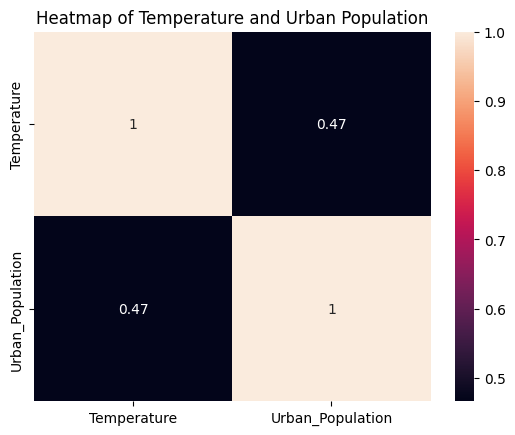


ADF Test for Average Temperature
ADF Statistic: -3.4066703548963684
P value: 0.010733570588527978
Used Lag: 0

ADF Test for Urban Population
ADF Statistic: -1.7776647806432928
P value: 0.39160552447873126
Used Lag: 0
Isolation Forest Results Summary
Outlier_Label
Normal     125
Outlier      7
Name: count, dtype: int64

Detected Outliers
    Temperature  Urban_Population
25         32.6             9.152
49         32.3            18.878
58         29.9            23.774
60         33.6            24.954
61         34.2            25.553
62         32.2            26.159
63         32.4            26.771


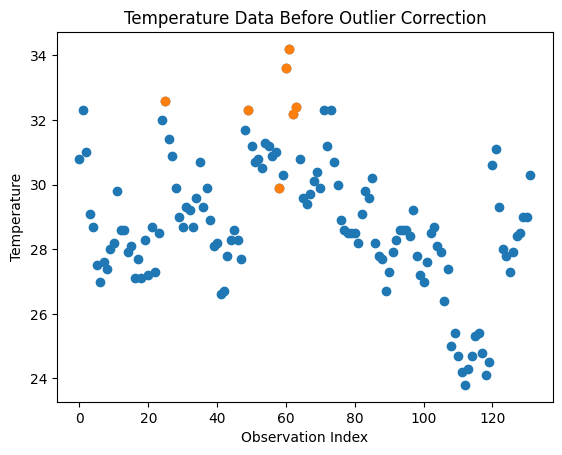

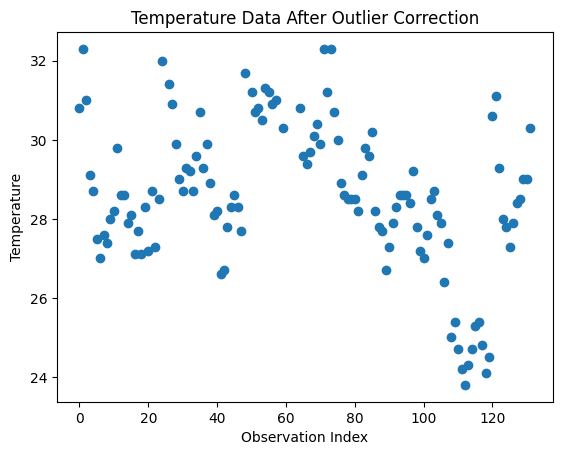


Original data size: 132
Cleaned data size: 125


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from prophet import Prophet
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Bidirectional
from scipy.stats import pearsonr

# Step 2: Read dataset (already uploaded via files.upload())
file_path = "Temperature Data.xlsx"
df = pd.read_excel(file_path)
df.columns = ["City", "Temperature", "Urban_Population"]

print("\nDescriptive Statistics\n")
print(df.describe())

plt.figure()
sns.heatmap(df[["Temperature", "Urban_Population"]].corr(), annot=True)
plt.title("Heatmap of Temperature and Urban Population")
plt.show()

def adf_test(series, name):
    result = adfuller(series, autolag="AIC")
    print(f"\nADF Test for {name}")
    print(f"ADF Statistic: {result[0]}")
    print(f"P value: {result[1]}")
    print(f"Used Lag: {result[2]}")

adf_test(df["Temperature"], "Average Temperature")
adf_test(df["Urban_Population"], "Urban Population")

# Fit Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
df["Outlier"] = iso.fit_predict(df[["Temperature", "Urban_Population"]])

# Map results to readable labels
df["Outlier_Label"] = df["Outlier"].map({1: "Normal", -1: "Outlier"})

# Print summary of results
print("Isolation Forest Results Summary")
print(df["Outlier_Label"].value_counts())

# Display detected outliers
print("\nDetected Outliers")
print(df[df["Outlier"] == -1][["Temperature", "Urban_Population"]])

# Plot BEFORE outlier correction (actual data)
plt.figure()
plt.scatter(df.index, df["Temperature"])
plt.scatter(
    df[df["Outlier"] == -1].index,
    df[df["Outlier"] == -1]["Temperature"]
)
plt.title("Temperature Data Before Outlier Correction")
plt.xlabel("Observation Index")
plt.ylabel("Temperature")
plt.show()

# Remove outliers
df_clean = df[df["Outlier"] == 1].drop(columns=["Outlier", "Outlier_Label"])

# Plot AFTER outlier correction (cleaned data)
plt.figure()
plt.scatter(df_clean.index, df_clean["Temperature"])
plt.title("Temperature Data After Outlier Correction")
plt.xlabel("Observation Index")
plt.ylabel("Temperature")
plt.show()

# Confirm cleaned data size
print("\nOriginal data size:", df.shape[0])
print("Cleaned data size:", df_clean.shape[0])

Model Fitting

In [1]:
# Step 1: Upload file manually
from google.colab import files
import pandas as pd

uploaded = files.upload()  # This lets you pick file from your PC
file_path = list(uploaded.keys())[0]  # Automatically use uploaded filename

# Step 2: Read dataset
# Use pd.read_excel for .xlsx files
data = pd.read_excel(file_path)
print("Temperature Data (first 5 rows):")
print(data.head())

Saving Temperature Data.xlsx to Temperature Data.xlsx
Temperature Data (first 5 rows):
   Date  City  Temperature  Urban_Population
0  2012  ARUA         30.8             4.417
1  2013  ARUA         32.3             4.617
2  2014  ARUA         31.0             4.826
3  2015  ARUA         29.1             5.045
4  2016  ARUA         28.7             5.273


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from prophet import Prophet
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Bidirectional
from scipy.stats import pearsonr
from sklearn.metrics (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# Step 2: Read dataset (already uploaded via files.upload())
file_path = "Temperature Data.xlsx"
df = pd.read_excel(file_path)
df.columns = ["City", "Temperature", "Urban_Population"]

print("\nDescriptive Statistics\n")
print(df.describe())

plt.figure()
sns.heatmap(df[["Temperature", "Urban_Population"]].corr(), annot=True)
plt.title("Heatmap of Temperature and Urban Population")
plt.show()

def adf_test(series, name):
    result = adfuller(series, autolag="AIC")
    print(f"\nADF Test for {name}")
    print(f"ADF Statistic: {result[0]}")
    print(f"P value: {result[1]}")
    print(f"Used Lag: {result[2]}")

adf_test(df["Temperature"], "Average Temperature")
adf_test(df["Urban_Population"], "Urban Population")

# Fit Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
df["Outlier"] = iso.fit_predict(df[["Temperature", "Urban_Population"]])

# Map results to readable labels
df["Outlier_Label"] = df["Outlier"].map({1: "Normal", -1: "Outlier"})

# Print summary of results
print("Isolation Forest Results Summary")
print(df["Outlier_Label"].value_counts())

# Display detected outliers
print("\nDetected Outliers")
print(df[df["Outlier"] == -1][["Temperature", "Urban_Population"]])

# Plot BEFORE outlier correction (actual data)
plt.figure()
plt.scatter(
    df.index, df["Temperature"],
)
plt.scatter(
    df[df["Outlier"] == -1].index,
    df[df["Outlier"] == -1]["Temperature"],
)
plt.title("Temperature Data Before Outlier Correction")
plt.xlabel("Observation Index")
plt.ylabel("Temperature")
plt.show()

# Remove outliers
df_clean = df[df["Outlier"] == 1].drop(columns=["Outlier", "Outlier_Label"])

# Plot AFTER outlier correction (cleaned data)
plt.figure()
plt.scatter(df_clean.index, df_clean["Temperature"])
plt.title("Temperature Data After Outlier Correction")
plt.xlabel("Observation Index")
plt.ylabel("Temperature")
plt.show()

# Confirm cleaned data size
print("\nOriginal data size:", df.shape[0])
print("Cleaned data size:", df_clean.shape[0])

# TRAIN TEST SPLIT
train_size = int(len(df_clean) * 0.7)
train = df_clean.iloc[:train_size]
test = df_clean.iloc[train_size:]

y_train = train["Temperature"].values
y_test = test["Temperature"].values
x_train = train["Urban_Population"].values
x_test = test["Urban_Population"].values

# PERFORMANCE METRICS
def metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    smape = 100 * np.mean(
        2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))
    )
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, mape, smape, r2

# DEEP LEARNING BENCHMARKS
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_clean[["Temperature"]])

def create_seq(data, n_steps=3):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i : i + n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

# Create sequences from the entire scaled dataset
X_seq, y_seq = create_seq(scaled)

# Determine the split points for deep learning data to align test set length with y_test
dl_test_samples = len(y_test)
dl_train_samples = len(y_seq) - dl_test_samples

X_train_dl_seq, X_test_dl_seq = (
    X_seq[:dl_train_samples], X_seq[dl_train_samples:]
)
y_train_dl_seq, y_test_dl_seq = (
    y_seq[:dl_train_samples], y_seq[dl_train_samples:]
)

# Generic builder for recurrent models, now accepting input_seq_shape
def build_model(cell, input_seq_shape, bidirectional=False):
    model = Sequential()

    if bidirectional:
        model.add(
            Bidirectional(
                cell(50, activation="tanh"), input_shape=input_seq_shape
            )
        )
    else:
        model.add(cell(50, activation="tanh", input_shape=input_seq_shape))

    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mse")
    return model

# ARIMA MODEL
# Train ARIMA on the training data
auto_arima = pm.auto_arima(y_train, seasonal=False)
arima_model = ARIMA(y_train, order=auto_arima.order).fit()

print("\nARIMA Parameters")
print(arima_model.params)

# Forecast for the test period
arima_pred = arima_model.forecast(len(y_test))

#ARIMA-LSTM HYBRID
# Calculate residuals from ARIMA model on TRAINING data
residuals_train = y_train - arima_model.fittedvalues
scaler_res = MinMaxScaler() # Use a separate scaler for residuals
res_scaled_train = scaler_res.fit_transform(residuals_train.reshape(-1,1))

# Create sequences for LSTM training from scaled residuals
n_steps = 3 # from create_seq function
Xr_train_res, yr_train_res = create_seq(res_scaled_train, n_steps=n_steps)
lstm_res = build_model(LSTM, (Xr_train_res.shape[1], 1)) # input_shape must be consistent with Xr_train_res
lstm_res.fit(Xr_train_res, yr_train_res, epochs=30, verbose=0)

# Forecast future residuals for the test period iteratively
res_forecast_list = []
# Initialize with the last n_steps of training residuals
current_input_res = res_scaled_train[-n_steps:].reshape(1, n_steps, 1)

for _ in range(len(y_test)):
    next_residual_scaled = lstm_res.predict(current_input_res, verbose=0)[0, 0] # verbose=0 to suppress output
    res_forecast_list.append(next_residual_scaled)
    # Update current_input by removing the first element and adding the new prediction
    # This creates a sliding window for multi-step forecasting
    current_input_res = np.append(
        current_input_res[:, 1:, :], [[[next_residual_scaled]]], axis=1
    )

res_forecast = scaler_res.inverse_transform(
    np.array(res_forecast_list).reshape(-1, 1)
).flatten()
hybrid_pred = arima_pred + res_forecast

print("\nHybrid Model Parameters")
print(lstm_res.summary())


# FACEBOOK PROPHET
prophet_df = df_clean.reset_index()
prophet_df["ds"] = pd.date_range(start="2017", periods=len(prophet_df), freq="M")
prophet_df.rename(columns={"Temperature":"y"}, inplace=True)

model_p = Prophet()
model_p.fit(prophet_df.iloc[:train_size])

future = model_p.make_future_dataframe(periods=len(y_test), freq="M")
forecast = model_p.predict(future)
prophet_pred = forecast["yhat"].iloc[-len(y_test):].values

# MACHINE LEARNING BENCHMARKS

X_ml = df_clean[["Urban_Population"]]
y_ml = df_clean[["Temperature"]]
# Split ML data into train and test
X_train_ml, X_test_ml = X_ml.iloc[:train_size], X_ml.iloc[train_size:]
y_train_ml, y_test_ml = y_ml.iloc[:train_size], y_ml.iloc[train_size:]

ml_models = {
    "RandomForest": RandomForestRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "SVR": SVR(),
    "GBM": GradientBoostingRegressor(),
    "KNN": KNeighborsRegressor()
}

predictions = {}
for name, model in ml_models.items():
    # Train ML models on training data
    model.fit(X_train_ml, y_train)
    # Predict on test data
    pred = model.predict(X_test_ml)
    predictions[name] = pred
    print(f"\n{name} Parameters")
    print(model.get_params())

# Add Prophet predictions to the dictionary as well
predictions["Prophet"] = prophet_pred

# Deep learning models
# Build models with appropriate input shape for training data
models_dl = {
    "LSTM": build_model(LSTM, (X_train_dl_seq.shape[1], 1)),
    "RNN": build_model(SimpleRNN, (X_train_dl_seq.shape[1], 1)),
    "GRU": build_model(GRU, (X_train_dl_seq.shape[1], 1)),
    "BiLSTM": build_model(LSTM, (X_train_dl_seq.shape[1], 1), bidirectional=True),
    "BiGRU": build_model(GRU, (X_train_dl_seq.shape[1], 1), bidirectional=True),
    "BiRNN": build_model(SimpleRNN, (X_train_dl_seq.shape[1], 1), bidirectional=True),
}

# MLP requires flattened input
mlp = Sequential()
mlp.add(Dense(50, activation="relu", input_dim=X_train_dl_seq.shape[1]))
mlp.add(Dense(1))
mlp.compile(optimizer="adam", loss="mse")

models_dl["MLP"] = mlp

# Train deep learning models on training data and predict on test data
for name, model in models_dl.items():
    # Train on training sequences
    model.fit(X_train_dl_seq if name != "MLP" else X_train_dl_seq.reshape(X_train_dl_seq.shape[0], -1),
              y_train_dl_seq,
              epochs=30,
              verbose=0)

    # Predict on test sequences
    preds = model.predict(
        X_test_dl_seq if name != "MLP" else X_test_dl_seq.reshape(X_test_dl_seq.shape[0], -1),
        verbose=0 # Suppress predict output for each model
    )

    predictions[name] = scaler.inverse_transform(preds).flatten()

# MODEL COMPARISON
# Initialize results dictionary
results = {}

# Explicit list of deep learning benchmark models
deep_learning_models = [
    "LSTM",
    "RNN",
    "GRU",
    "BiGRU",
    "BiRNN",
    "MLP"
]

# Explicit list of machine learning benchmark models
machine_learning_models = [
    "RandomForest",
    "DecisionTree",
    "SVR",
    "GBM",
    "KNN"
]

# Add ARIMA
results["ARIMA"] = metrics(y_test, arima_pred)

# Add Facebook Prophet
results["Prophet"] = metrics(y_test, prophet_pred)

# Add ARIMA-LSTM Hybrid
results["ARIMA-LSTM"] = metrics(y_test, hybrid_pred)

# Add Deep Learning Models
for model in deep_learning_models:
    if model in predictions:
        results[model] = metrics(y_test, predictions[model])

# Add Machine Learning Models
for model in machine_learning_models:
    if model in predictions:
        results[model] = metrics(y_test, predictions[model])

# Create comparison table
results_df = pd.DataFrame(
    results,
    index=["RMSE", "MAE", "MAPE", "SMAPE", "R2"]
).T

# Sort models by RMSE (best on top)
results_df = results_df.sort_values(by="RMSE")

print("\nMODEL PERFORMANCE COMPARISON\n")
print(results_df.round(4))

# VISUALIZATION ACTUAL VS PREDICTED
for name in results_df.index[:-1]: # Iterate only over names
    plt.figure()
    plt.plot(y_test, label="Actual")
    # Check if the model name exists in predictions dictionary before plotting
    if name in predictions:
        plt.plot(predictions[name], label=name)
    else:
        # Handle cases where predictions might not be available for a model (e.g., ARIMA/ARIMA-LSTM are not in `predictions` yet)
        # For ARIMA and ARIMA-LSTM, their predictions are in `arima_pred` and `hybrid_pred` respectively.
        if name == "ARIMA":
            plt.plot(arima_pred, label=name)
        elif name == "ARIMA-LSTM":
            plt.plot(hybrid_pred, label=name)
        # Add other specific cases if any model's prediction is not in the `predictions` dict


    plt.legend()
    plt.title(f"Actual vs Predicted: {name}")
    plt.show()

# CORRELATION CHECK FOR HYBRID MODEL
# Correlation should be between actual test values and hybrid predictions for the test set
corr, _ = pearsonr(y_test, hybrid_pred)
print("\nCorrelation between Actual (Test) and Hybrid Prediction (Test):", corr)

# DERIVED CLASSIFICATION METRICS FOR ALL MODELS

# Binary temperature state based on median threshold
threshold = np.median(y_train)
y_test_cls = (y_test > threshold).astype(int)

def to_class(pred):
    return (pred > threshold).astype(int)

def to_prob(pred):
    return (pred - pred.min()) / (pred.max() - pred.min() + 1e-8)

def classification_metrics(y_true, y_pred, y_prob):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Sensitivity": recall_score(y_true, y_pred),
        "F1_score": f1_score(y_true, y_pred),
        "AUC": roc_auc_score(y_true, y_prob)
    }

# Collect predictions consistently
all_predictions = {
    "ARIMA": arima_pred,
    "Prophet": prophet_pred,
    "ARIMA-LSTM": hybrid_pred,
    **predictions  # DL and ML models
}

cls_results = {}

for model_name, y_hat in all_predictions.items():
    if y_hat is not None:
        cls_results[model_name] = classification_metrics(
            y_test_cls,
            to_class(y_hat),
            to_prob(y_hat)
        )

cls_df = pd.DataFrame(cls_results).T.round(4)

print("\nCLASSIFICATION METRICS (Derived Temperature States)\n")
print(cls_df)

# TIME SERIES CROSS VALIDATION WITH RMSE

tscv = TimeSeriesSplit(n_splits=5)

def cv_rmse(model, X, y):
    rmses = []
    for train_idx, test_idx in tscv.split(X):
        model.fit(X.iloc[train_idx], y.iloc[train_idx])
        pred = model.predict(X.iloc[test_idx])
        rmses.append(np.sqrt(mean_squared_error(y.iloc[test_idx], pred)))
    return np.mean(rmses)

cv_scores = {}

for name, model in ml_models.items():
    cv_scores[name] = cv_rmse(model, X_ml, y_ml.squeeze())

print("\nTIME SERIES CROSS VALIDATION RMSE\n")
print(pd.Series(cv_scores).round(4))

# HYPERPARAMETER TUNING FOR ML BENCHMARK MODELS

param_grids = {
    "RandomForest": {
        "n_estimators": [100, 200],
        "max_depth": [3, 5, None]
    },
    "DecisionTree": {
        "max_depth": [3, 5, None]
    },
    "SVR": {
        "C": [0.1, 1, 10],
        "gamma": ["scale", "auto"]
    },
    "GBM": {
        "learning_rate": [0.01, 0.1],
        "n_estimators": [100, 200]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7]
    }
}

best_models = {}

for name, grid in param_grids.items():
    gcv = GridSearchCV(
        ml_models[name],
        grid,
        scoring="neg_root_mean_squared_error",
        cv=tscv
    )
    gcv.fit(X_train_ml, y_train)
    best_models[name] = gcv.best_estimator_

    print(f"\nBest Hyperparameters for {name}")
    print(gcv.best_params_)

# PREDICTION INTERVAL COVERAGE

coverage = {}

for model_name, pred in all_predictions.items():
    if pred is not None:
        sigma = np.std(pred)
        lower = pred - 1.96 * sigma
        upper = pred + 1.96 * sigma
        coverage[model_name] = np.mean(
            (y_test >= lower) & (y_test <= upper)
        )

coverage_df = pd.Series(coverage).round(4)

print("\nPREDICTION INTERVAL COVERAGE (95 percent)\n")
print(coverage_df)

# FORECASTING TEMPERATURE DYNAMICS FOR NEXT 7 YEARS USING ARIMA LSTM

# ============================
# 7 YEAR AHEAD FORECAST (2024–2030)
# ARIMA–LSTM HYBRID
# ============================

forecast_horizon = 7  # 7 years annual forecast

cities = df_clean["City"].unique()

forecast_results = {}

for city in cities:
    print(f"\n===== Forecast for {city} =====")

    city_df = df_clean[df_clean["City"] == city].reset_index(drop=True)
    y_city = city_df["Temperature"].values

    # ----------------------------
    # ARIMA component
    # ----------------------------
    auto_arima_city = pm.auto_arima(y_city, seasonal=False, suppress_warnings=True)
    arima_city = ARIMA(y_city, order=auto_arima_city.order).fit()

    arima_forecast = arima_city.forecast(steps=forecast_horizon)

    # ----------------------------
    # LSTM residual component
    # ----------------------------
    residuals_city = y_city - arima_city.fittedvalues

    scaler_city = MinMaxScaler()
    residuals_scaled = scaler_city.fit_transform(residuals_city.reshape(-1, 1))

    Xr_city, yr_city = create_seq(residuals_scaled, n_steps=n_steps)

    lstm_city = build_model(LSTM, (Xr_city.shape[1], 1))
    lstm_city.fit(Xr_city, yr_city, epochs=30, verbose=0)

    # Iterative residual forecasting
    res_future = []
    current_input = residuals_scaled[-n_steps:].reshape(1, n_steps, 1)

    for _ in range(forecast_horizon):
        next_res = lstm_city.predict(current_input, verbose=0)[0, 0]
        res_future.append(next_res)
        current_input = np.append(
            current_input[:, 1:, :],
            [[[next_res]]],
            axis=1
        )

    res_future = scaler_city.inverse_transform(
        np.array(res_future).reshape(-1, 1)
    ).flatten()

    # ----------------------------
    # Hybrid forecast
    # ----------------------------
hybrid_forecast = arima_forecast + res_future

    # Time index
    forecast_dates = pd.date_range(
        start="2024-12-31",
        periods=forecast_horizon,
        freq="Y"
    )

    forecast_df = pd.DataFrame({
        "Date": forecast_dates,
        "Forecasted_Temperature": hybrid_forecast
    })

    forecast_results[city] = forecast_df

    # Print first 7 years for reporting
    print(forecast_df.head(7).round(3))

    # ----------------------------
    # Plot
    # ----------------------------
    plt.figure(figsize=(10, 5))
    plt.plot(
        pd.date_range(start="2023-12-31", periods=len(y_city), freq="Y"),
        y_city,
        label="Historical"
    )
    plt.plot(
        forecast_df["Date"],
        forecast_df["Forecasted_Temperature"],
        label="Forecast (2024–2030)"
    )
    plt.title(f"ARIMA–LSTM Temperature Forecast for {city}")
    plt.xlabel("Year")
    plt.ylabel("Temperature")
    plt.legend()
    plt.grid(True)
    plt.show()

SyntaxError: invalid syntax (ipython-input-1763632469.py, line 20)

In [3]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 9.0 MB/s eta 0:00:00



Descriptive Statistics

              Date  Temperature  Urban_Population
count   132.000000   132.000000        132.000000
mean   2017.500000    28.793182          9.297394
std       3.465203     2.032229          5.868116
min    2012.000000    23.800000          3.460158
25%    2014.750000    27.775000          5.684159
50%    2017.500000    28.600000          6.759670
75%    2020.250000    30.125000         11.170500
max    2023.000000    34.200000         26.771000


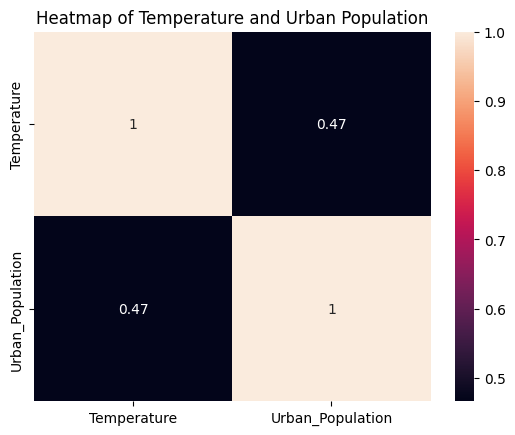


ADF Test for Average Temperature
ADF Statistic: -3.4066703548963684
P value: 0.010733570588527978
Used Lag: 0

ADF Test for Urban Population
ADF Statistic: -1.7776647806432928
P value: 0.39160552447873126
Used Lag: 0
Isolation Forest Results Summary
Outlier_Label
Normal     125
Outlier      7
Name: count, dtype: int64

Detected Outliers
    Temperature  Urban_Population
25         32.6             9.152
49         32.3            18.878
58         29.9            23.774
60         33.6            24.954
61         34.2            25.553
62         32.2            26.159
63         32.4            26.771


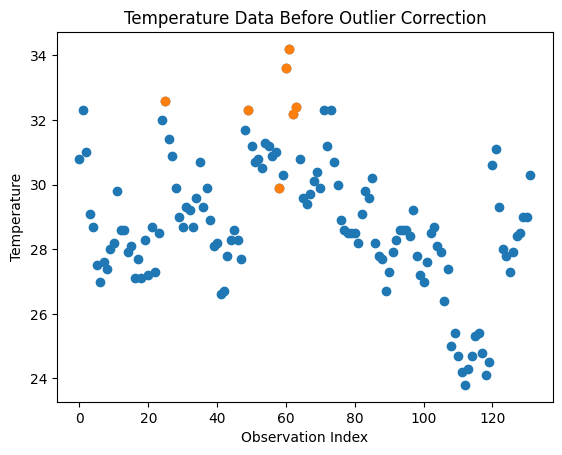

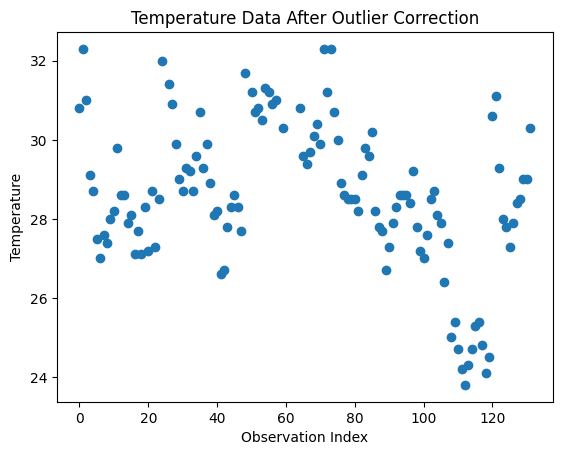


Original data size: 132
Cleaned data size: 125

ARIMA Parameters
[29.21344638  0.74678495  0.92551191]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Hybrid Model Parameters


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

None


/tmp/ipython-input-2508956944.py:195: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  prophet_df["ds"] = pd.date_range(start="2017", periods=len(prophet_df), freq="M")
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(



RandomForest Parameters
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

DecisionTree Parameters
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}

SVR Parameters
{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}

GBM Parameters
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedma

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



MODEL PERFORMANCE COMPARISON

                RMSE     MAE    MAPE   SMAPE      R2
BiRNN         1.3127  0.9078  3.3455  3.3311  0.5538
RNN           1.5332  1.1256  4.1652  4.1376  0.3913
MLP           1.5883  1.1451  4.2264  4.2123  0.3468
BiGRU         1.6153  1.2476  4.6740  4.6075  0.3244
LSTM          1.7642  1.4092  5.2988  5.2009  0.1941
GRU           1.7820  1.4199  5.3745  5.2469  0.1778
RandomForest  1.8373  1.4163  5.4356  5.2618  0.1260
DecisionTree  1.8864  1.5605  5.9261  5.7740  0.0786
GBM           1.9190  1.5062  5.7782  5.5826  0.0465
KNN           2.1779  1.6511  6.3950  6.0963 -0.2281
SVR           2.3415  1.7699  6.8776  6.5179 -0.4196
Prophet       2.3781  1.8977  6.8644  7.0819 -0.4644
ARIMA-LSTM    2.7435  2.1445  8.3476  7.8117 -0.9488
ARIMA         2.7774  2.1776  8.4755  7.9250 -0.9974


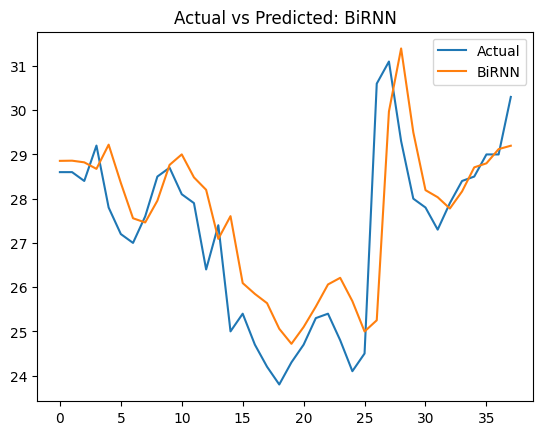

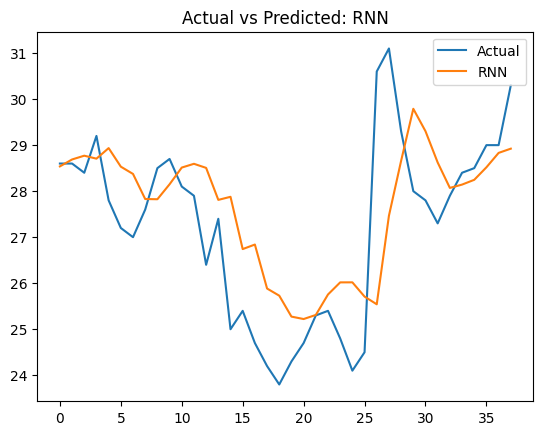

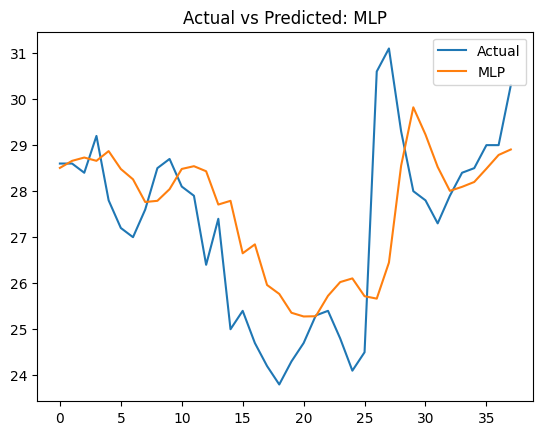

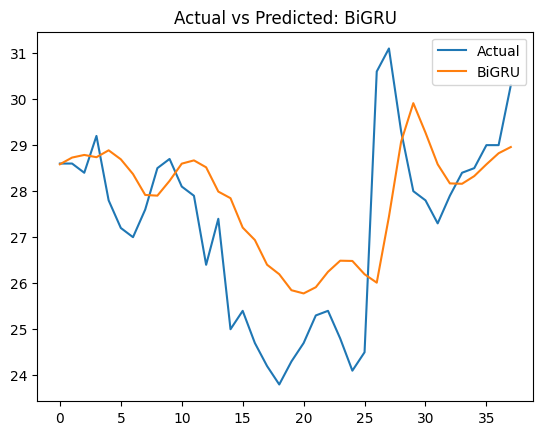

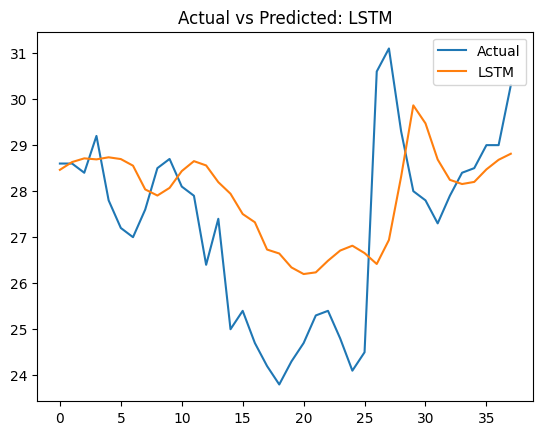

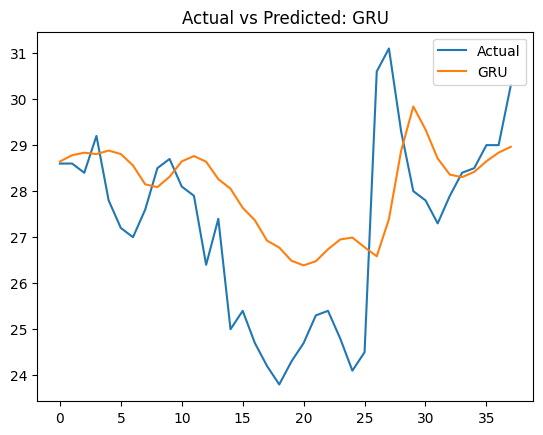

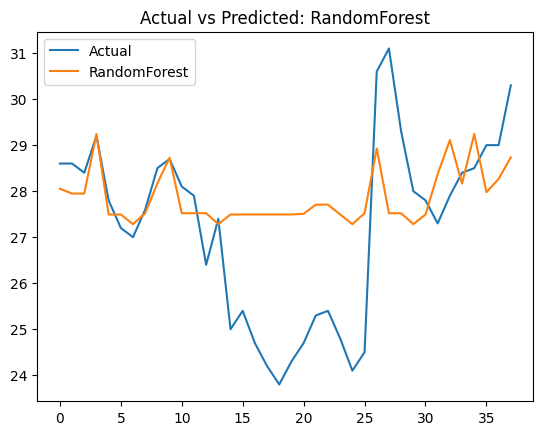

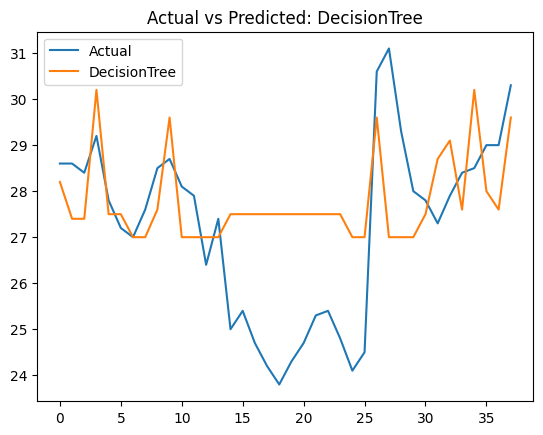

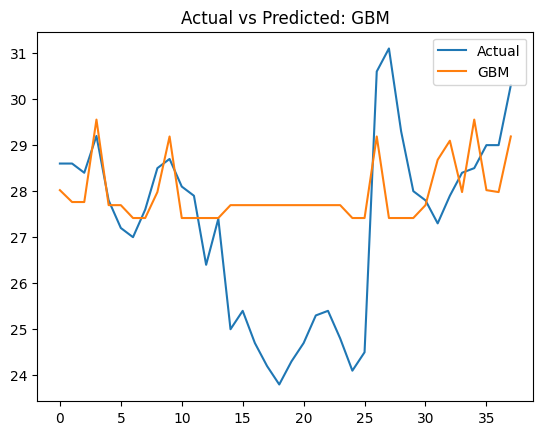

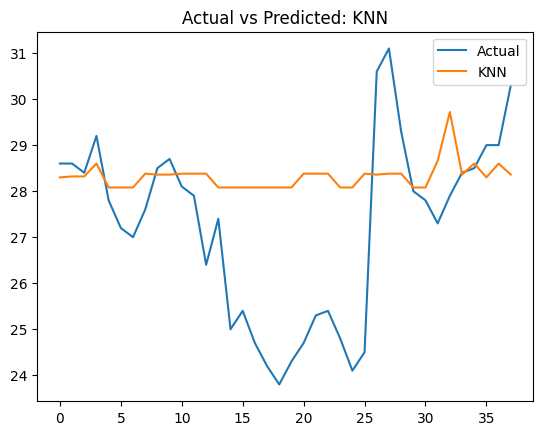

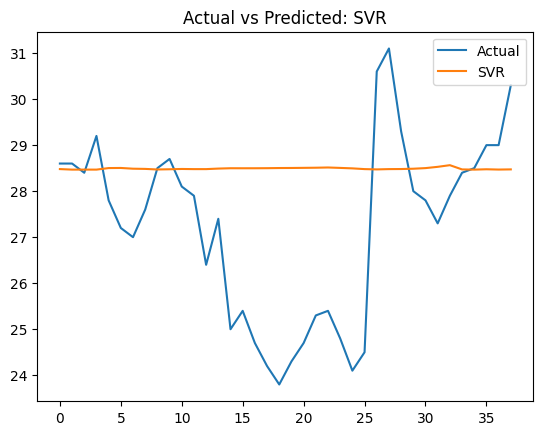

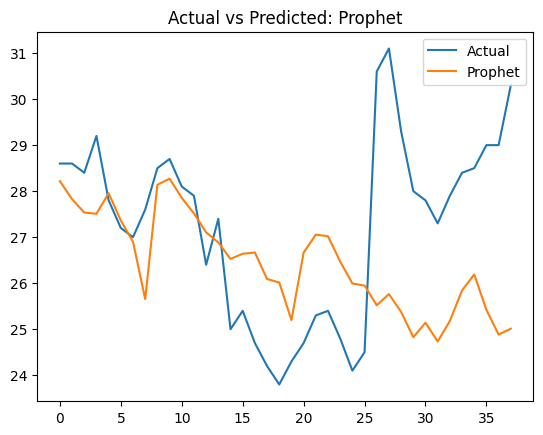

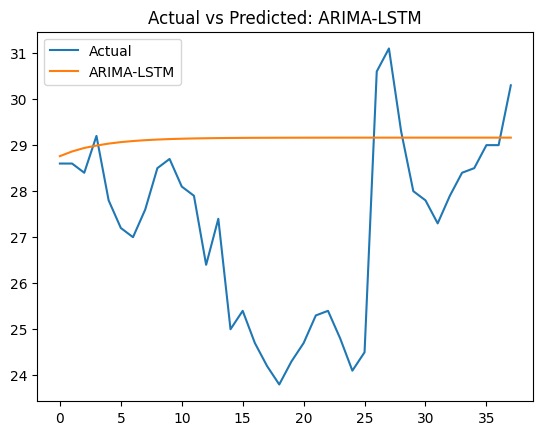


Correlation between Actual (Test) and Hybrid Prediction (Test): -0.25417585042491686

CLASSIFICATION METRICS (Derived Temperature States)

              Accuracy  Precision  Sensitivity  F1_score     AUC
ARIMA           0.2368     0.1944       1.0000    0.3256  0.7880
Prophet         0.8158     0.0000       0.0000    0.0000  0.2212
ARIMA-LSTM      0.2368     0.1944       1.0000    0.3256  0.7880
RandomForest    0.8158     0.5000       0.2857    0.3636  0.8041
DecisionTree    0.8158     0.5000       0.4286    0.4615  0.6889
SVR             0.8158     0.0000       0.0000    0.0000  0.1705
GBM             0.8158     0.5000       0.4286    0.4615  0.6912
KNN             0.7895     0.0000       0.0000    0.0000  0.7212
LSTM            0.7632     0.0000       0.0000    0.0000  0.6083
RNN             0.7632     0.2500       0.1429    0.1818  0.6682
GRU             0.7895     0.3333       0.1429    0.2000  0.6774
BiLSTM          0.8158     0.5000       0.2857    0.3636  0.6866
BiGRU          

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


        Date  Forecasted_Temperature
0 2024-12-31                  30.302
1 2025-12-31                  30.096
2 2026-12-31                  29.606
3 2027-12-31                  28.794
4 2028-12-31                  28.447
5 2029-12-31                  28.375
6 2030-12-31                  28.464


/tmp/ipython-input-2508956944.py:532: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(
/tmp/ipython-input-2508956944.py:553: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  pd.date_range(start="2023-12-31", periods=len(y_city), freq="Y"),


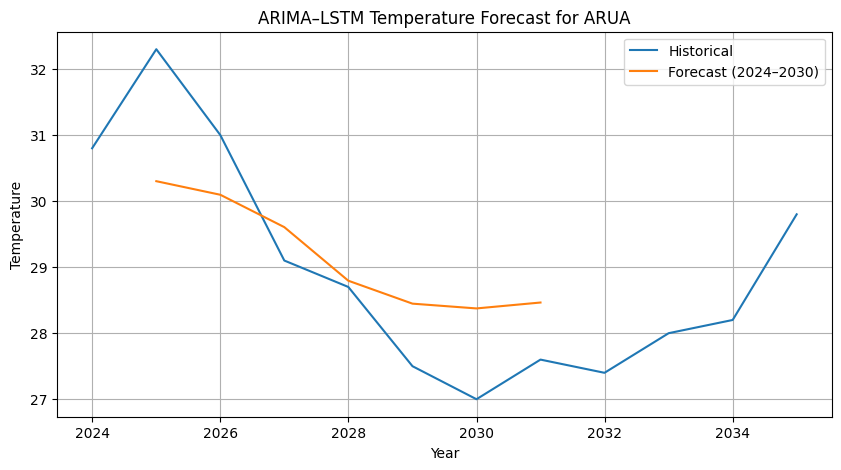


===== Forecast for ENTEBBE =====


/usr/local/lib/python3.12/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(3,0,1)(0,0,0)[0]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/pmdarima/arima/arima.py", line 610, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.12/dist-packages/pmdarima/arima/arima.py", line 531, in _fit
    fit, self.arima_res_ = _fit_wrapper()
                           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pmdarima/arima/arima.py", line 517, in _fit_wrapper
    fitted = arima.fit(
             ^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 705, in fit
    mlefit = super().fit(start_pa

        Date  Forecasted_Temperature
0 2024-12-31                  27.058
1 2025-12-31                  28.223
2 2026-12-31                  27.057
3 2027-12-31                  28.270
4 2028-12-31                  27.152
5 2029-12-31                  28.304
6 2030-12-31                  27.208


/tmp/ipython-input-2508956944.py:532: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(
/tmp/ipython-input-2508956944.py:553: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  pd.date_range(start="2023-12-31", periods=len(y_city), freq="Y"),


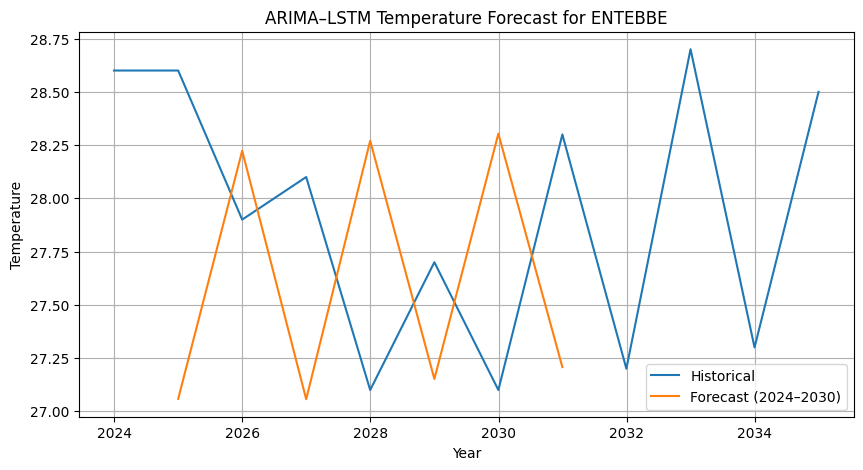


===== Forecast for GULU =====


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/tmp/ipython-input-2508956944.py:532: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(
/tmp/ipython-input-2508956944.py:553: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  pd.date_range(start="2023-12-31", periods=len(y_city), freq="Y"),


        Date  Forecasted_Temperature
0 2024-12-31                  31.186
1 2025-12-31                  31.436
2 2026-12-31                  31.128
3 2027-12-31                  30.689
4 2028-12-31                  30.292
5 2029-12-31                  29.988
6 2030-12-31                  29.844


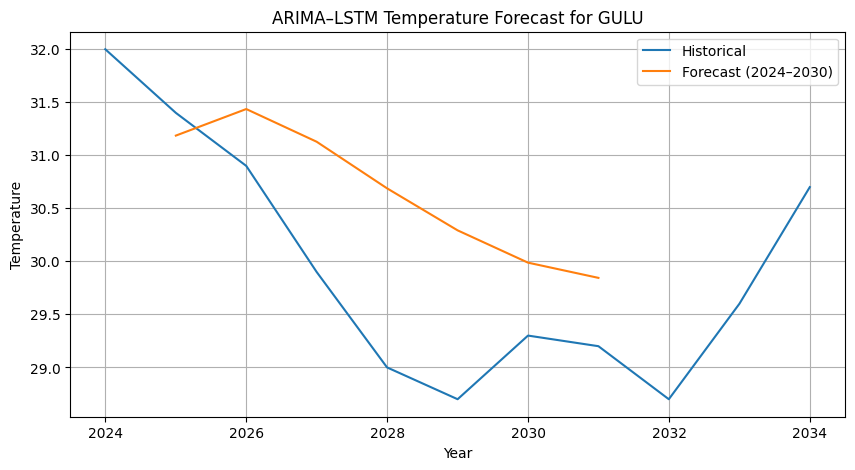


===== Forecast for KAMPALA =====


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/tmp/ipython-input-2508956944.py:532: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(
/tmp/ipython-input-2508956944.py:553: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  pd.date_range(start="2023-12-31", periods=len(y_city), freq="Y"),


        Date  Forecasted_Temperature
0 2024-12-31                  27.512
1 2025-12-31                  27.855
2 2026-12-31                  27.782
3 2027-12-31                  27.805
4 2028-12-31                  27.776
5 2029-12-31                  27.760
6 2030-12-31                  27.757


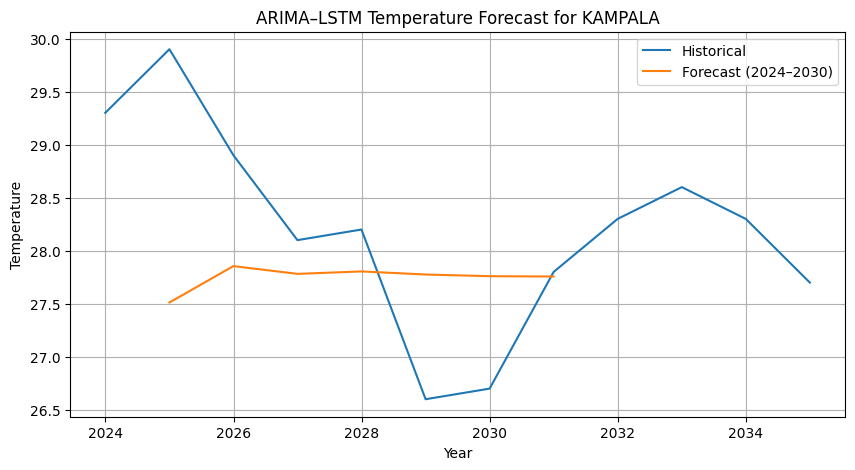


===== Forecast for KASESE =====


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/tmp/ipython-

        Date  Forecasted_Temperature
0 2024-12-31                  30.576
1 2025-12-31                  30.823
2 2026-12-31                  30.628
3 2027-12-31                  30.765
4 2028-12-31                  30.712
5 2029-12-31                  30.734
6 2030-12-31                  30.730


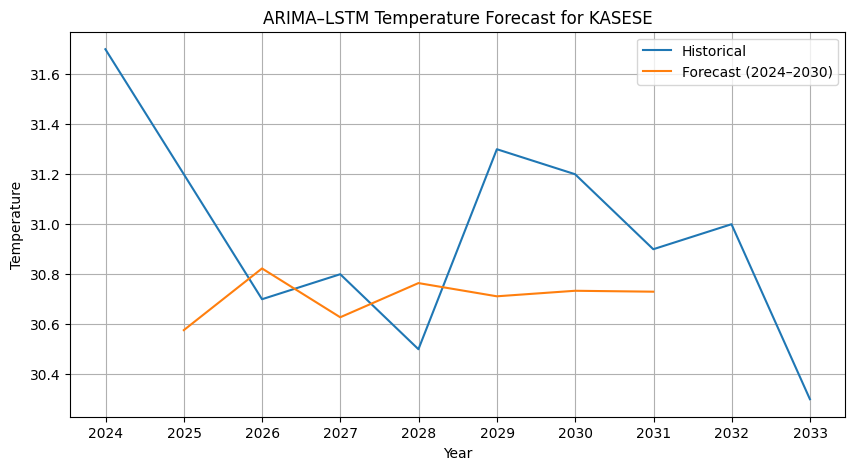


===== Forecast for LIRA =====


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


        Date  Forecasted_Temperature
0 2024-12-31                  30.574
1 2025-12-31                  30.646
2 2026-12-31                  30.823
3 2027-12-31                  30.529
4 2028-12-31                  30.549
5 2029-12-31                  30.541
6 2030-12-31                  30.491


/tmp/ipython-input-2508956944.py:532: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(
/tmp/ipython-input-2508956944.py:553: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  pd.date_range(start="2023-12-31", periods=len(y_city), freq="Y"),


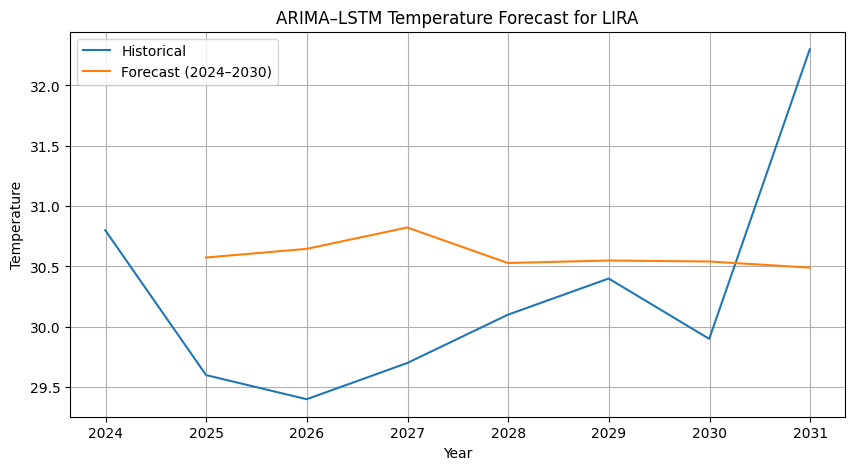


===== Forecast for MASINDI =====


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


        Date  Forecasted_Temperature
0 2024-12-31                  29.745
1 2025-12-31                  29.873
2 2026-12-31                  29.802
3 2027-12-31                  29.714
4 2028-12-31                  29.715
5 2029-12-31                  29.691
6 2030-12-31                  29.674


/tmp/ipython-input-2508956944.py:532: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(
/tmp/ipython-input-2508956944.py:553: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  pd.date_range(start="2023-12-31", periods=len(y_city), freq="Y"),


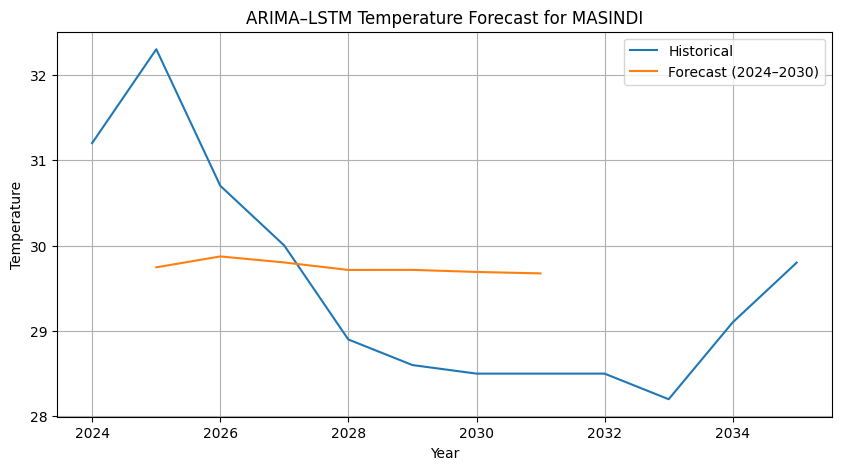


===== Forecast for JINJA =====


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


        Date  Forecasted_Temperature
0 2024-12-31                  28.273
1 2025-12-31                  28.167
2 2026-12-31                  28.094
3 2027-12-31                  28.043
4 2028-12-31                  28.028
5 2029-12-31                  28.008
6 2030-12-31                  27.994


/tmp/ipython-input-2508956944.py:532: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(
/tmp/ipython-input-2508956944.py:553: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  pd.date_range(start="2023-12-31", periods=len(y_city), freq="Y"),


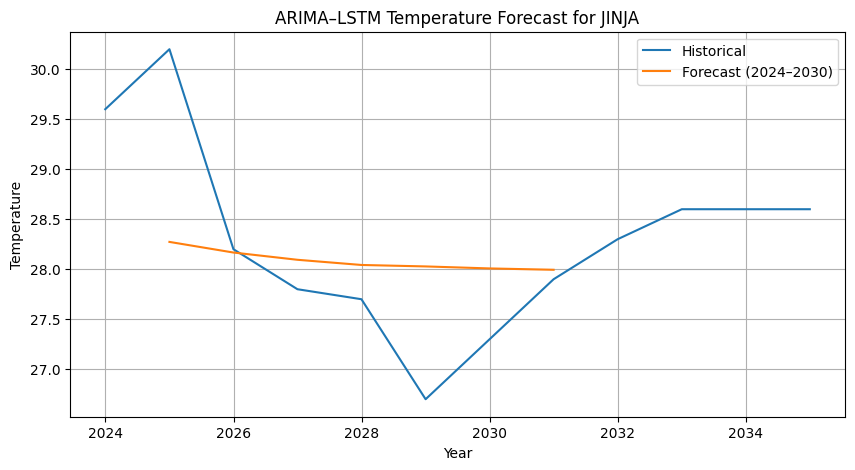


===== Forecast for MBARARA =====


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


        Date  Forecasted_Temperature
0 2024-12-31                  27.340
1 2025-12-31                  27.140
2 2026-12-31                  27.292
3 2027-12-31                  27.151
4 2028-12-31                  27.148
5 2029-12-31                  27.153
6 2030-12-31                  27.131


/tmp/ipython-input-2508956944.py:532: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(
/tmp/ipython-input-2508956944.py:553: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  pd.date_range(start="2023-12-31", periods=len(y_city), freq="Y"),


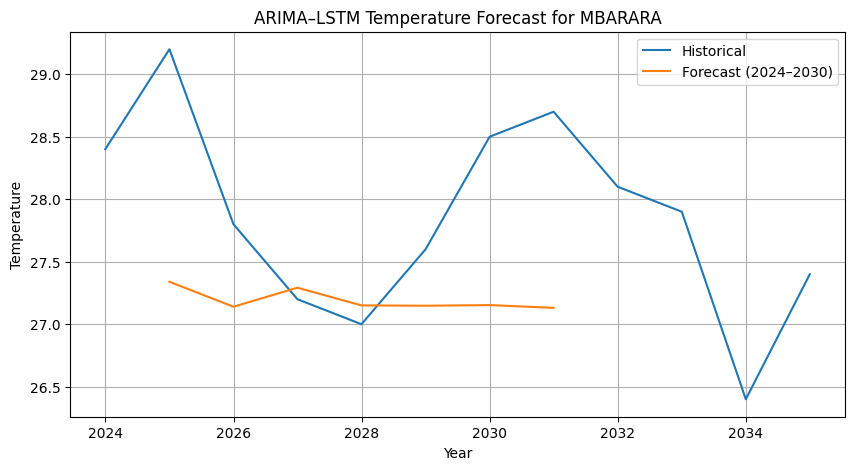


===== Forecast for KABALE =====


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/tmp/ipython-input-2508956944.py:532: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(
/tmp/ipython-input-2508956944.py:553: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  pd.date_range(start="2023-12-31", periods=len(y_city), freq="Y"),


        Date  Forecasted_Temperature
0 2024-12-31                  24.554
1 2025-12-31                  24.444
2 2026-12-31                  24.508
3 2027-12-31                  24.443
4 2028-12-31                  24.444
5 2029-12-31                  24.446
6 2030-12-31                  24.434


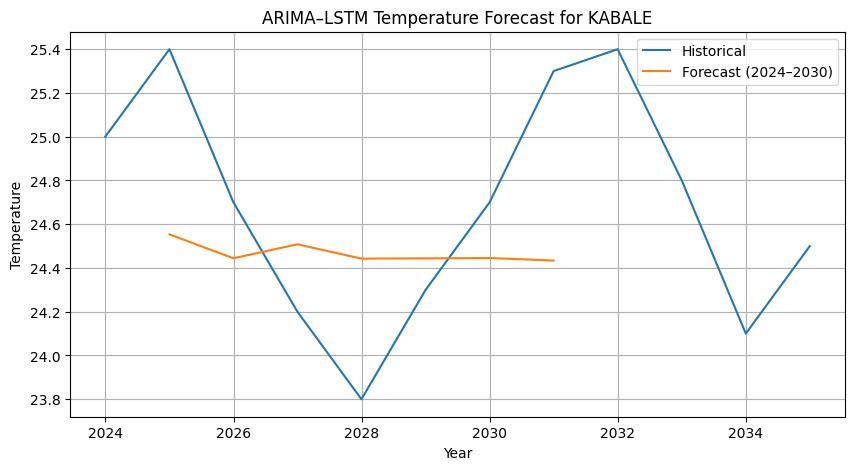


===== Forecast for SOROTI =====


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/tmp/ipython-input-2508956944.py:532: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(
/tmp/ipython-input-2508956944.py:553: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  pd.date_range(start="2023-12-31", periods=len(y_city), freq="Y"),


        Date  Forecasted_Temperature
0 2024-12-31                  29.983
1 2025-12-31                  29.484
2 2026-12-31                  28.841
3 2027-12-31                  28.020
4 2028-12-31                  27.637
5 2029-12-31                  27.612
6 2030-12-31                  27.899


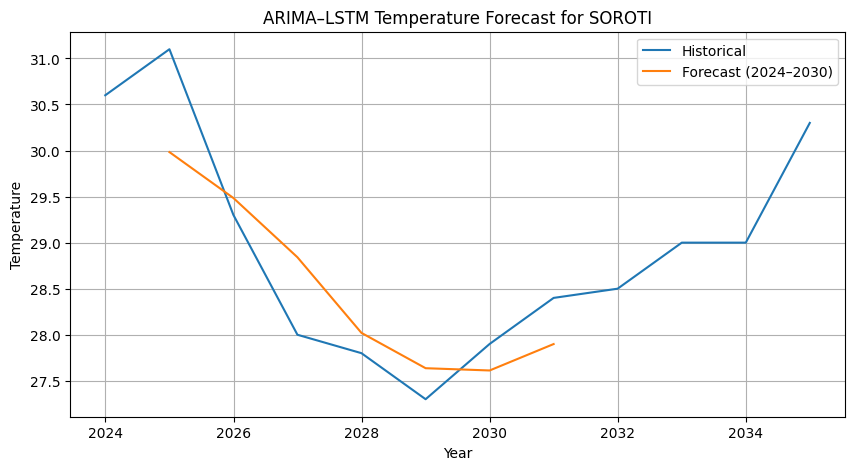

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from prophet import Prophet
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Bidirectional
from scipy.stats import pearsonr
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# Step 2: Read dataset (already uploaded via files.upload())
file_path = "Temperature Data.xlsx"
df = pd.read_excel(file_path)
df.columns = ["Date", "City", "Temperature", "Urban_Population"] # Corrected this line

print("\nDescriptive Statistics\n")
print(df.describe())

plt.figure()
sns.heatmap(df[["Temperature", "Urban_Population"]].corr(), annot=True)
plt.title("Heatmap of Temperature and Urban Population")
plt.show()

def adf_test(series, name):
    result = adfuller(series, autolag="AIC")
    print(f"\nADF Test for {name}")
    print(f"ADF Statistic: {result[0]}")
    print(f"P value: {result[1]}")
    print(f"Used Lag: {result[2]}")

adf_test(df["Temperature"], "Average Temperature")
adf_test(df["Urban_Population"], "Urban Population")

# Fit Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
df["Outlier"] = iso.fit_predict(df[["Temperature", "Urban_Population"]])

# Map results to readable labels
df["Outlier_Label"] = df["Outlier"].map({1: "Normal", -1: "Outlier"})

# Print summary of results
print("Isolation Forest Results Summary")
print(df["Outlier_Label"].value_counts())

# Display detected outliers
print("\nDetected Outliers")
print(df[df["Outlier"] == -1][["Temperature", "Urban_Population"]])

# Plot BEFORE outlier correction (actual data)
plt.figure()
plt.scatter(df.index, df["Temperature"])
plt.scatter(
    df[df["Outlier"] == -1].index,
    df[df["Outlier"] == -1]["Temperature"]
)
plt.title("Temperature Data Before Outlier Correction")
plt.xlabel("Observation Index")
plt.ylabel("Temperature")
plt.show()

# Remove outliers
df_clean = df[df["Outlier"] == 1].drop(columns=["Outlier", "Outlier_Label"])

# Plot AFTER outlier correction (cleaned data)
plt.figure()
plt.scatter(df_clean.index, df_clean["Temperature"])
plt.title("Temperature Data After Outlier Correction")
plt.xlabel("Observation Index")
plt.ylabel("Temperature")
plt.show()

# Confirm cleaned data size
print("\nOriginal data size:", df.shape[0])
print("Cleaned data size:", df_clean.shape[0])

# TRAIN TEST SPLIT
train_size = int(len(df_clean) * 0.7)
train = df_clean.iloc[:train_size]
test = df_clean.iloc[train_size:]

y_train = train["Temperature"].values
y_test = test["Temperature"].values
x_train = train["Urban_Population"].values
x_test = test["Urban_Population"].values

# PERFORMANCE METRICS
def metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    smape = 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, mape, smape, r2

# DEEP LEARNING BENCHMARKS
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_clean[["Temperature"]])

def create_seq(data, n_steps=3):
    X, y = [], []
    for i in range(len(data)-n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Create sequences from the entire scaled dataset
X_seq, y_seq = create_seq(scaled)

# Determine the split points for deep learning data to align test set length with y_test
dl_test_samples = len(y_test)
dl_train_samples = len(y_seq) - dl_test_samples

X_train_dl_seq, X_test_dl_seq = X_seq[:dl_train_samples], X_seq[dl_train_samples:]
y_train_dl_seq, y_test_dl_seq = y_seq[:dl_train_samples], y_seq[dl_train_samples:]

# Generic builder for recurrent models, now accepting input_seq_shape
def build_model(cell, input_seq_shape, bidirectional=False):
    model = Sequential()

    if bidirectional:
        model.add(
            Bidirectional(
                cell(50, activation="tanh"),
                input_shape=input_seq_shape
            )
        )
    else:
        model.add(
            cell(50, activation="tanh", input_shape=input_seq_shape)
        )

    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mse")
    return model

# ARIMA MODEL
# Train ARIMA on the training data
auto_arima = pm.auto_arima(y_train, seasonal=False)
arima_model = ARIMA(y_train, order=auto_arima.order).fit()

print("\nARIMA Parameters")
print(arima_model.params)

# Forecast for the test period
arima_pred = arima_model.forecast(len(y_test))

#ARIMA-LSTM HYBRID
# Calculate residuals from ARIMA model on TRAINING data
residuals_train = y_train - arima_model.fittedvalues
scaler_res = MinMaxScaler() # Use a separate scaler for residuals
res_scaled_train = scaler_res.fit_transform(residuals_train.reshape(-1,1))

# Create sequences for LSTM training from scaled residuals
n_steps = 3 # from create_seq function
Xr_train_res, yr_train_res = create_seq(res_scaled_train, n_steps=n_steps)
lstm_res = build_model(LSTM, (Xr_train_res.shape[1], 1)) # input_shape must be consistent with Xr_train_res
lstm_res.fit(Xr_train_res, yr_train_res, epochs=30, verbose=0)

# Forecast future residuals for the test period iteratively
res_forecast_list = []
# Initialize with the last n_steps of training residuals
current_input_res = res_scaled_train[-n_steps:].reshape(1, n_steps, 1)

for _ in range(len(y_test)):
    next_residual_scaled = lstm_res.predict(current_input_res, verbose=0)[0, 0] # verbose=0 to suppress output
    res_forecast_list.append(next_residual_scaled)
    # Update current_input by removing the first element and adding the new prediction
    # This creates a sliding window for multi-step forecasting
    current_input_res = np.append(current_input_res[:, 1:, :], [[[next_residual_scaled]]], axis=1)

res_forecast = scaler_res.inverse_transform(np.array(res_forecast_list).reshape(-1, 1)).flatten()
hybrid_pred = arima_pred + res_forecast

print("\nHybrid Model Parameters")
print(lstm_res.summary())


# FACEBOOK PROPHET
prophet_df = df_clean.reset_index()
prophet_df["ds"] = pd.date_range(start="2017", periods=len(prophet_df), freq="M")
prophet_df.rename(columns={"Temperature":"y"}, inplace=True)

model_p = Prophet()
model_p.fit(prophet_df.iloc[:train_size])

future = model_p.make_future_dataframe(periods=len(y_test), freq="M")
forecast = model_p.predict(future)
prophet_pred = forecast["yhat"].iloc[-len(y_test):].values

# MACHINE LEARNING BENCHMARKS

X_ml = df_clean[["Urban_Population"]]
y_ml = df_clean[["Temperature"]]
# Split ML data into train and test
X_train_ml, X_test_ml = X_ml.iloc[:train_size], X_ml.iloc[train_size:]
y_train_ml, y_test_ml = y_ml.iloc[:train_size], y_ml.iloc[train_size:]

ml_models = {
    "RandomForest": RandomForestRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "SVR": SVR(),
    "GBM": GradientBoostingRegressor(),
    "KNN": KNeighborsRegressor()
}

predictions = {}
for name, model in ml_models.items():
    # Train ML models on training data
    model.fit(X_train_ml, y_train)
    # Predict on test data
    pred = model.predict(X_test_ml)
    predictions[name] = pred
    print(f"\n{name} Parameters")
    print(model.get_params())

# Add Prophet predictions to the dictionary as well
predictions["Prophet"] = prophet_pred

# Deep learning models
# Build models with appropriate input shape for training data
models_dl = {
    "LSTM": build_model(LSTM, (X_train_dl_seq.shape[1], 1)),
    "RNN": build_model(SimpleRNN, (X_train_dl_seq.shape[1], 1)),
    "GRU": build_model(GRU, (X_train_dl_seq.shape[1], 1)),
    "BiLSTM": build_model(LSTM, (X_train_dl_seq.shape[1], 1), bidirectional=True),
    "BiGRU": build_model(GRU, (X_train_dl_seq.shape[1], 1), bidirectional=True),
    "BiRNN": build_model(SimpleRNN, (X_train_dl_seq.shape[1], 1), bidirectional=True),
}

# MLP requires flattened input
mlp = Sequential()
mlp.add(Dense(50, activation="relu", input_dim=X_train_dl_seq.shape[1]))
mlp.add(Dense(1))
mlp.compile(optimizer="adam", loss="mse")

models_dl["MLP"] = mlp

# Train deep learning models on training data and predict on test data
for name, model in models_dl.items():
    # Train on training sequences
    model.fit(X_train_dl_seq if name != "MLP" else X_train_dl_seq.reshape(X_train_dl_seq.shape[0], -1),
              y_train_dl_seq,
              epochs=30,
              verbose=0)

    # Predict on test sequences
    preds = model.predict(
        X_test_dl_seq if name != "MLP" else X_test_dl_seq.reshape(X_test_dl_seq.shape[0], -1),
        verbose=0 # Suppress predict output for each model
    )

    predictions[name] = scaler.inverse_transform(preds).flatten()

# MODEL COMPARISON
# Initialize results dictionary
results = {}

# Explicit list of deep learning benchmark models
deep_learning_models = [
    "LSTM",
    "RNN",
    "GRU",
    "BiGRU",
    "BiRNN",
    "MLP"
]

# Explicit list of machine learning benchmark models
machine_learning_models = [
    "RandomForest",
    "DecisionTree",
    "SVR",
    "GBM",
    "KNN"
]

# Add ARIMA
results["ARIMA"] = metrics(y_test, arima_pred)

# Add Facebook Prophet
results["Prophet"] = metrics(y_test, prophet_pred)

# Add ARIMA-LSTM Hybrid
results["ARIMA-LSTM"] = metrics(y_test, hybrid_pred)

# Add Deep Learning Models
for model in deep_learning_models:
    if model in predictions:
        results[model] = metrics(y_test, predictions[model])

# Add Machine Learning Models
for model in machine_learning_models:
    if model in predictions:
        results[model] = metrics(y_test, predictions[model])

# Create comparison table
results_df = pd.DataFrame(
    results,
    index=["RMSE", "MAE", "MAPE", "SMAPE", "R2"]
).T

# Sort models by RMSE (best on top)
results_df = results_df.sort_values(by="RMSE")

print("\nMODEL PERFORMANCE COMPARISON\n")
print(results_df.round(4))

# VISUALIZATION ACTUAL VS PREDICTED
for name in results_df.index[:-1]: # Iterate only over names
    plt.figure()
    plt.plot(y_test, label="Actual")
    # Check if the model name exists in predictions dictionary before plotting
    if name in predictions:
        plt.plot(predictions[name], label=name)
    else:
        # Handle cases where predictions might not be available for a model (e.g., ARIMA/ARIMA-LSTM are not in `predictions` yet)
        # For ARIMA and ARIMA-LSTM, their predictions are in `arima_pred` and `hybrid_pred` respectively.
        if name == "ARIMA":
            plt.plot(arima_pred, label=name)
        elif name == "ARIMA-LSTM":
            plt.plot(hybrid_pred, label=name)
        # Add other specific cases if any model's prediction is not in the `predictions` dict


    plt.legend()
    plt.title(f"Actual vs Predicted: {name}")
    plt.show()

# CORRELATION CHECK FOR HYBRID MODEL
# Correlation should be between actual test values and hybrid predictions for the test set
corr, _ = pearsonr(y_test, hybrid_pred)
print("\nCorrelation between Actual (Test) and Hybrid Prediction (Test):", corr)

# DERIVED CLASSIFICATION METRICS FOR ALL MODELS

# Binary temperature state based on median threshold
threshold = np.median(y_train)
y_test_cls = (y_test > threshold).astype(int)

def to_class(pred):
    return (pred > threshold).astype(int)

def to_prob(pred):
    return (pred - pred.min()) / (pred.max() - pred.min() + 1e-8)

def classification_metrics(y_true, y_pred, y_prob):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Sensitivity": recall_score(y_true, y_pred),
        "F1_score": f1_score(y_true, y_pred),
        "AUC": roc_auc_score(y_true, y_prob)
    }

# Collect predictions consistently
all_predictions = {
    "ARIMA": arima_pred,
    "Prophet": prophet_pred,
    "ARIMA-LSTM": hybrid_pred,
    **predictions  # DL and ML models
}

cls_results = {}

for model_name, y_hat in all_predictions.items():
    if y_hat is not None:
        cls_results[model_name] = classification_metrics(
            y_test_cls,
            to_class(y_hat),
            to_prob(y_hat)
        )

cls_df = pd.DataFrame(cls_results).T.round(4)

print("\nCLASSIFICATION METRICS (Derived Temperature States)\n")
print(cls_df)

# TIME SERIES CROSS VALIDATION WITH RMSE

tscv = TimeSeriesSplit(n_splits=5)

def cv_rmse(model, X, y):
    rmses = []
    for train_idx, test_idx in tscv.split(X):
        model.fit(X.iloc[train_idx], y.iloc[train_idx])
        pred = model.predict(X.iloc[test_idx])
        rmses.append(np.sqrt(mean_squared_error(y.iloc[test_idx], pred)))
    return np.mean(rmses)

cv_scores = {}

for name, model in ml_models.items():
    cv_scores[name] = cv_rmse(model, X_ml, y_ml.squeeze())

print("\nTIME SERIES CROSS VALIDATION RMSE\n")
print(pd.Series(cv_scores).round(4))

# HYPERPARAMETER TUNING FOR ML BENCHMARK MODELS

param_grids = {
    "RandomForest": {
        "n_estimators": [100, 200],
        "max_depth": [3, 5, None]
    },
    "DecisionTree": {
        "max_depth": [3, 5, None]
    },
    "SVR": {
        "C": [0.1, 1, 10],
        "gamma": ["scale", "auto"]
    },
    "GBM": {
        "learning_rate": [0.01, 0.1],
        "n_estimators": [100, 200]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7]
    }
}

best_models = {}

for name, grid in param_grids.items():
    gcv = GridSearchCV(
        ml_models[name],
        grid,
        scoring="neg_root_mean_squared_error",
        cv=tscv
    )
    gcv.fit(X_train_ml, y_train)
    best_models[name] = gcv.best_estimator_

    print(f"\nBest Hyperparameters for {name}")
    print(gcv.best_params_)

# PREDICTION INTERVAL COVERAGE

coverage = {}

for model_name, pred in all_predictions.items():
    if pred is not None:
        sigma = np.std(pred)
        lower = pred - 1.96 * sigma
        upper = pred + 1.96 * sigma
        coverage[model_name] = np.mean(
            (y_test >= lower) & (y_test <= upper)
        )

coverage_df = pd.Series(coverage).round(4)

print("\nPREDICTION INTERVAL COVERAGE (95 percent)\n")
print(coverage_df)

# FORECASTING TEMPERATURE DYNAMICS FOR NEXT 7 YEARS USING ARIMA LSTM

# ============================
# 7 YEAR AHEAD FORECAST (2024–2030)
# ARIMA–LSTM HYBRID
# ============================

forecast_horizon = 7  # 7 years annual forecast

cities = df_clean["City"].unique()

forecast_results = {}

for city in cities:
    print(f"\n===== Forecast for {city} =====")

    city_df = df_clean[df_clean["City"] == city].reset_index(drop=True)
    y_city = city_df["Temperature"].values

    # ----------------------------
    # ARIMA component
    # ----------------------------
    auto_arima_city = pm.auto_arima(y_city, seasonal=False, suppress_warnings=True)
    arima_city = ARIMA(y_city, order=auto_arima_city.order).fit()

    arima_forecast = arima_city.forecast(steps=forecast_horizon)

    # ----------------------------
    # LSTM residual component
    # ----------------------------
    residuals_city = y_city - arima_city.fittedvalues

    scaler_city = MinMaxScaler()
    residuals_scaled = scaler_city.fit_transform(residuals_city.reshape(-1, 1))

    Xr_city, yr_city = create_seq(residuals_scaled, n_steps=n_steps)

    lstm_city = build_model(LSTM, (Xr_city.shape[1], 1))
    lstm_city.fit(Xr_city, yr_city, epochs=30, verbose=0)

    # Iterative residual forecasting
    res_future = []
    current_input = residuals_scaled[-n_steps:].reshape(1, n_steps, 1)

    for _ in range(forecast_horizon):
        next_res = lstm_city.predict(current_input, verbose=0)[0, 0]
        res_future.append(next_res)
        current_input = np.append(
            current_input[:, 1:, :],
            [[[next_res]]],
            axis=1
        )

    res_future = scaler_city.inverse_transform(
        np.array(res_future).reshape(-1, 1)
    ).flatten()

    # ----------------------------
    # Hybrid forecast
    # ----------------------------
    hybrid_forecast = arima_forecast + res_future

    # Time index
    forecast_dates = pd.date_range(
        start="2024-12-31",
        periods=forecast_horizon,
        freq="Y"
    )

    forecast_df = pd.DataFrame({
        "Date": forecast_dates,
        "Forecasted_Temperature": hybrid_forecast
    })

    forecast_results[city] = forecast_df

    # Print first 7 years for reporting
    print(forecast_df.head(7).round(3))

    # ----------------------------
    # Plot
    # ----------------------------
    plt.figure(figsize=(10, 5))
    plt.plot(
        pd.date_range(start="2023-12-31", periods=len(y_city), freq="Y"),
        y_city,
        label="Historical"
    )
    plt.plot(
        forecast_df["Date"],
        forecast_df["Forecasted_Temperature"],
        label="Forecast (2024–2030)"
    )
    plt.title(f"ARIMA–LSTM Temperature Forecast for {city}")
    plt.xlabel("Year")
    plt.ylabel("Temperature")
    plt.legend()
    plt.grid(True)
    plt.show()


Descriptive Statistics

              Date  Temperature  Urban_Population
count   132.000000   132.000000        132.000000
mean   2017.500000    28.793182          9.297394
std       3.465203     2.032229          5.868116
min    2012.000000    23.800000          3.460158
25%    2014.750000    27.775000          5.684159
50%    2017.500000    28.600000          6.759670
75%    2020.250000    30.125000         11.170500
max    2023.000000    34.200000         26.771000


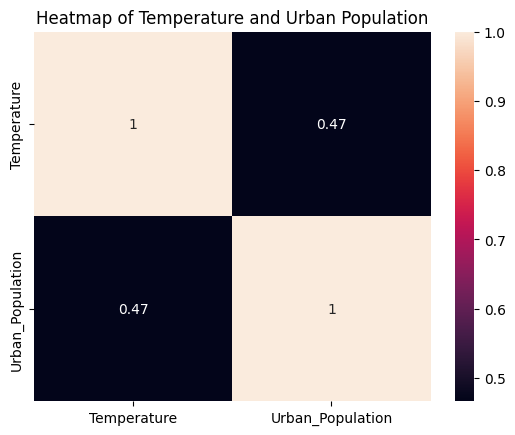


ADF Test for Average Temperature
ADF Statistic: -3.4066703548963684
P value: 0.010733570588527978
Used Lag: 0

ADF Test for Urban Population
ADF Statistic: -1.7776647806432928
P value: 0.39160552447873126
Used Lag: 0
Isolation Forest Results Summary
Outlier_Label
Normal     125
Outlier      7
Name: count, dtype: int64

Detected Outliers
    Temperature  Urban_Population
25         32.6             9.152
49         32.3            18.878
58         29.9            23.774
60         33.6            24.954
61         34.2            25.553
62         32.2            26.159
63         32.4            26.771


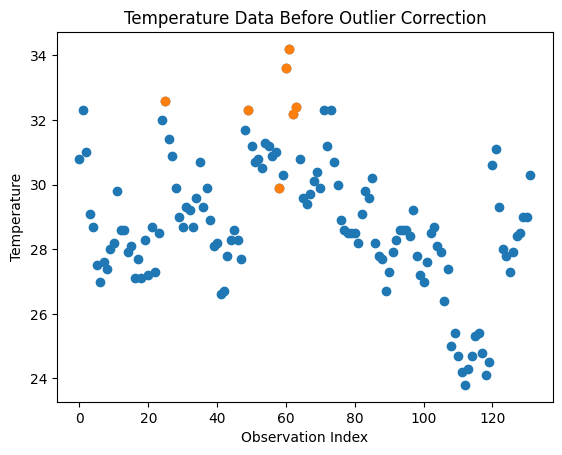

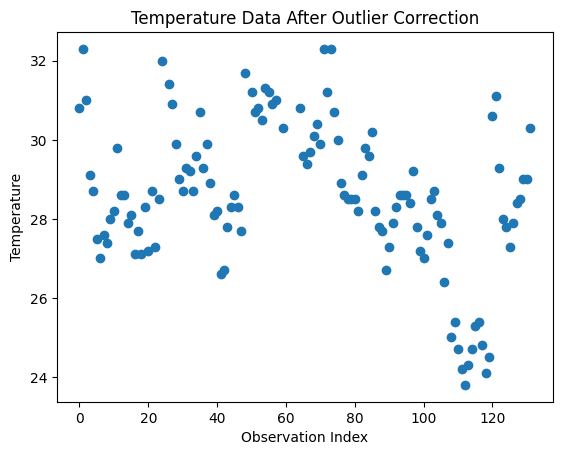


Original data size: 132
Cleaned data size: 125

ARIMA Parameters
[29.21344638  0.74678495  0.92551191]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Hybrid Model Parameters


Model: "sequential_133"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_118 (LSTM)                 │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_136 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

/tmp/ipython-input-1860804595.py:197: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  prophet_df["ds"] = pd.date_range(start="2017", periods=len(prophet_df), freq="M")
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


None


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(



RandomForest Parameters
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

DecisionTree Parameters
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}

SVR Parameters
{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}

GBM Parameters
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedma

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



MODEL PERFORMANCE COMPARISON

                RMSE     MAE    MAPE   SMAPE      R2
BiRNN         1.3380  0.9020  3.3073  3.2992  0.5365
RNN           1.3773  0.9556  3.5093  3.5062  0.5088
MLP           1.6594  1.2437  4.5972  4.5756  0.2871
GRU           1.6648  1.3049  4.9179  4.8257  0.2824
BiGRU         1.7016  1.3461  5.0759  4.9779  0.2503
LSTM          1.7433  1.3882  5.2242  5.1245  0.2131
DecisionTree  1.8864  1.5605  5.9261  5.7740  0.0786
RandomForest  1.8974  1.4416  5.5554  5.3535  0.0679
GBM           1.9190  1.5062  5.7782  5.5826  0.0465
KNN           2.1779  1.6511  6.3950  6.0963 -0.2281
SVR           2.3415  1.7699  6.8776  6.5179 -0.4196
Prophet       2.3781  1.8977  6.8644  7.0819 -0.4644
ARIMA-LSTM    2.7186  2.1184  8.2476  7.7224 -0.9136
ARIMA         2.7774  2.1776  8.4755  7.9250 -0.9974


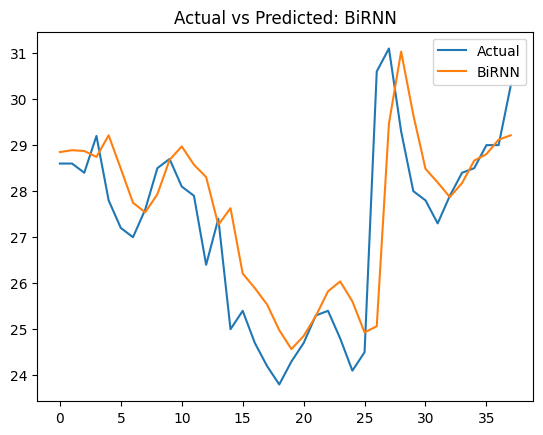

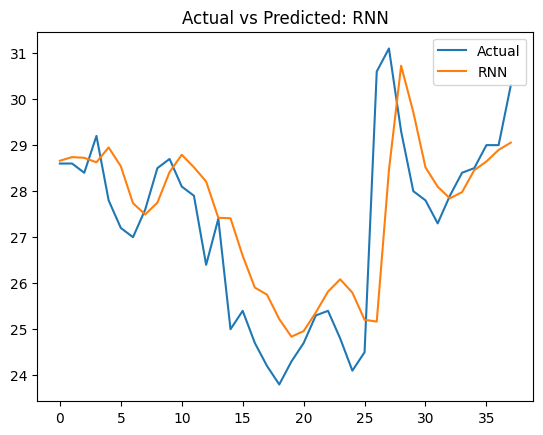

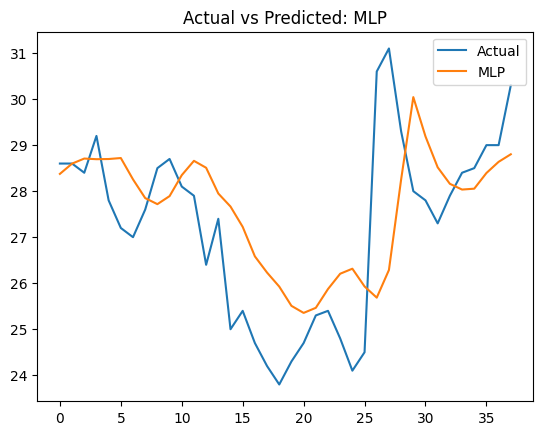

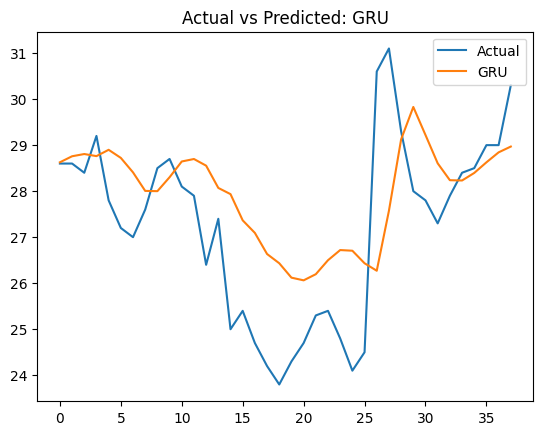

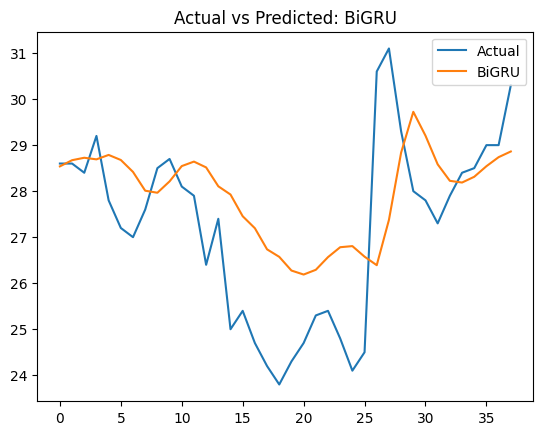

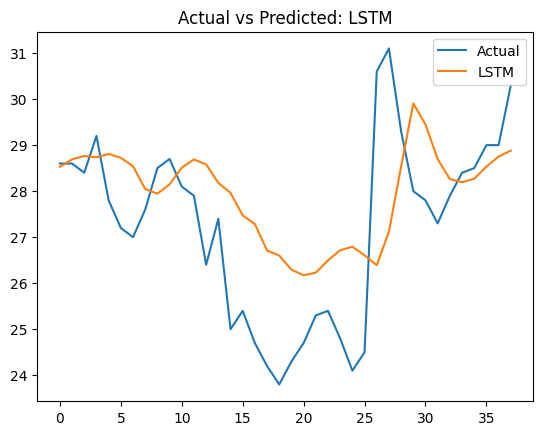

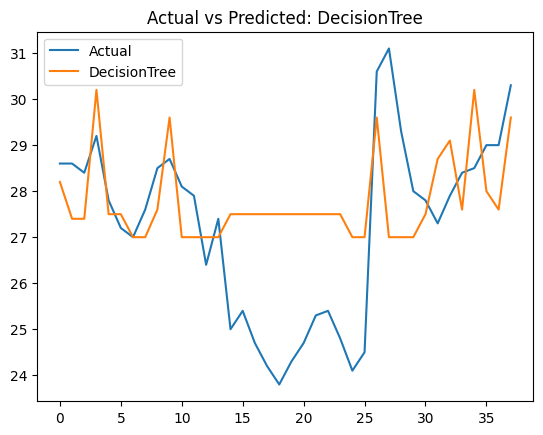

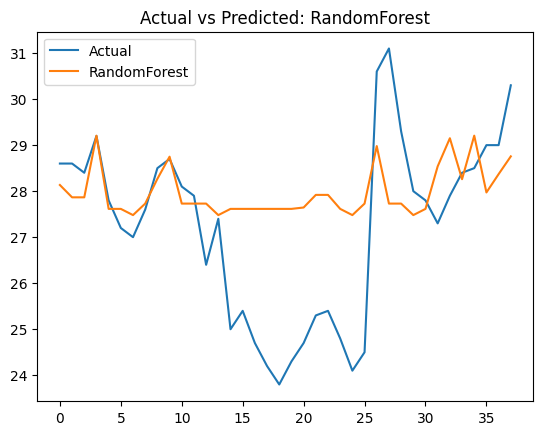

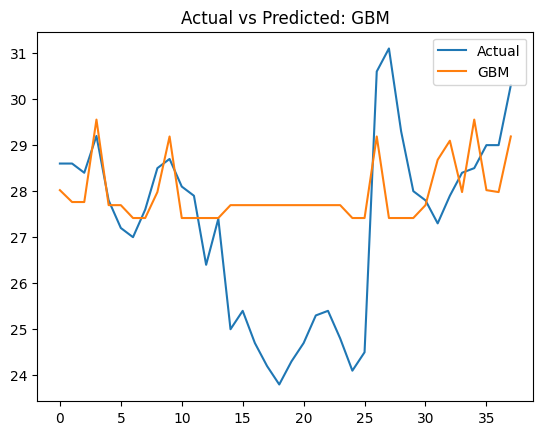

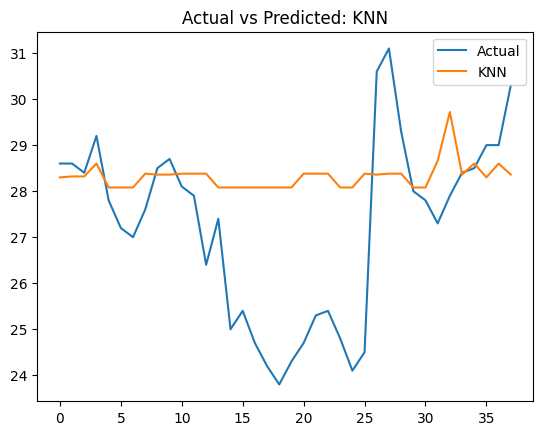

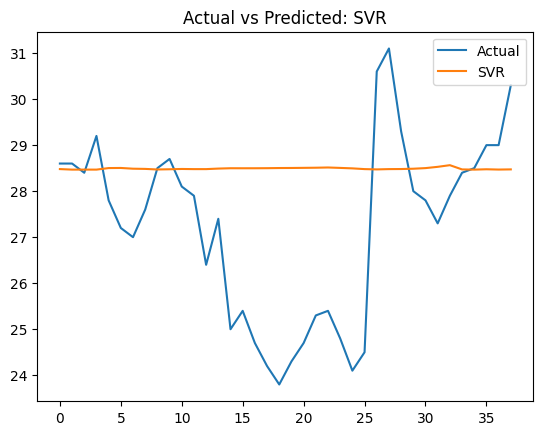

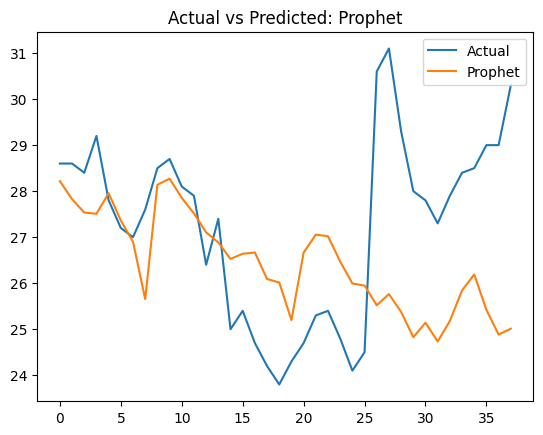

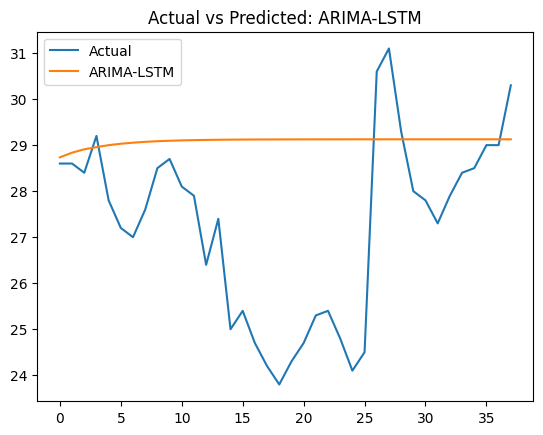


Correlation between Actual (Test) and Hybrid Prediction (Test): -0.25459418377312726

CLASSIFICATION METRICS (Derived Temperature States)

              Accuracy  Precision  Sensitivity  F1_score     AUC
ARIMA           0.2368     0.1944       1.0000    0.3256  0.7880
Prophet         0.8158     0.0000       0.0000    0.0000  0.2212
ARIMA-LSTM      0.2368     0.1944       1.0000    0.3256  0.7880
RandomForest    0.8158     0.5000       0.2857    0.3636  0.8041
DecisionTree    0.8158     0.5000       0.4286    0.4615  0.6889
SVR             0.8158     0.0000       0.0000    0.0000  0.1705
GBM             0.8158     0.5000       0.4286    0.4615  0.6912
KNN             0.7895     0.0000       0.0000    0.0000  0.7212
LSTM            0.7632     0.0000       0.0000    0.0000  0.6313
RNN             0.8158     0.5000       0.2857    0.3636  0.7558
GRU             0.8158     0.5000       0.2857    0.3636  0.6866
BiLSTM          0.8158     0.5000       0.2857    0.3636  0.6866
BiGRU          

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a l


MULTI SPLIT WALK FORWARD RESULTS

   Split       Model    RMSE     MAE    MAPE   SMAPE      R2
0  70:30       ARIMA  1.3491  0.8461  3.0958  3.1126  0.5288
1  70:30  ARIMA-LSTM  1.4327  0.9501  3.4963  3.4892  0.4685
2  80:20       ARIMA  1.5638  0.9702  3.5598  3.6032  0.5209
3  80:20  ARIMA-LSTM  1.6176  1.0257  3.7964  3.8176  0.4874
4  90:10       ARIMA  1.8852  1.0575  3.5780  3.7413 -0.3593
5  90:10  ARIMA-LSTM  1.8709  1.0423  3.5266  3.6811 -0.3387

DIEBOLD–MARIANO TEST RESULTS

       Model 1       Model 2  DM Statistic
0   ARIMA-LSTM         ARIMA       -5.6540
1   ARIMA-LSTM       Prophet        0.8104
2   ARIMA-LSTM  RandomForest        4.3452
3   ARIMA-LSTM  DecisionTree        3.5689
4   ARIMA-LSTM           SVR        4.6577
5   ARIMA-LSTM           GBM        4.0952
6   ARIMA-LSTM           KNN        4.3350
7   ARIMA-LSTM          LSTM        3.1826
8   ARIMA-LSTM           RNN        3.2595
9   ARIMA-LSTM           GRU        3.3527
10  ARIMA-LSTM        BiLSTM      

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from prophet import Prophet
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Bidirectional
from scipy.stats import pearsonr
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from scipy.stats import ttest_rel
from statsmodels.stats.diagnostic import acorr_ljungbox

# Step 2: Read dataset (already uploaded via files.upload())
file_path = "Temperature Data.xlsx"
df = pd.read_excel(file_path)
df.columns = ["Date", "City", "Temperature", "Urban_Population"] # Corrected this line

print("\nDescriptive Statistics\n")
print(df.describe())

plt.figure()
sns.heatmap(df[["Temperature", "Urban_Population"]].corr(), annot=True)
plt.title("Heatmap of Temperature and Urban Population")
plt.show()

def adf_test(series, name):
    result = adfuller(series, autolag="AIC")
    print(f"\nADF Test for {name}")
    print(f"ADF Statistic: {result[0]}")
    print(f"P value: {result[1]}")
    print(f"Used Lag: {result[2]}")

adf_test(df["Temperature"], "Average Temperature")
adf_test(df["Urban_Population"], "Urban Population")

# Fit Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
df["Outlier"] = iso.fit_predict(df[["Temperature", "Urban_Population"]])

# Map results to readable labels
df["Outlier_Label"] = df["Outlier"].map({1: "Normal", -1: "Outlier"})

# Print summary of results
print("Isolation Forest Results Summary")
print(df["Outlier_Label"].value_counts())

# Display detected outliers
print("\nDetected Outliers")
print(df[df["Outlier"] == -1][["Temperature", "Urban_Population"]])

# Plot BEFORE outlier correction (actual data)
plt.figure()
plt.scatter(df.index, df["Temperature"])
plt.scatter(
    df[df["Outlier"] == -1].index,
    df[df["Outlier"] == -1]["Temperature"]
)
plt.title("Temperature Data Before Outlier Correction")
plt.xlabel("Observation Index")
plt.ylabel("Temperature")
plt.show()

# Remove outliers
df_clean = df[df["Outlier"] == 1].drop(columns=["Outlier", "Outlier_Label"])

# Plot AFTER outlier correction (cleaned data)
plt.figure()
plt.scatter(df_clean.index, df_clean["Temperature"])
plt.title("Temperature Data After Outlier Correction")
plt.xlabel("Observation Index")
plt.ylabel("Temperature")
plt.show()

# Confirm cleaned data size
print("\nOriginal data size:", df.shape[0])
print("Cleaned data size:", df_clean.shape[0])

# TRAIN TEST SPLIT
train_size = int(len(df_clean) * 0.7)
train = df_clean.iloc[:train_size]
test = df_clean.iloc[train_size:]

y_train = train["Temperature"].values
y_test = test["Temperature"].values
x_train = train["Urban_Population"].values
x_test = test["Urban_Population"].values

# PERFORMANCE METRICS
def metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    smape = 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, mape, smape, r2

# DEEP LEARNING BENCHMARKS
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_clean[["Temperature"]])

def create_seq(data, n_steps=3):
    X, y = [], []
    for i in range(len(data)-n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Create sequences from the entire scaled dataset
X_seq, y_seq = create_seq(scaled)

# Determine the split points for deep learning data to align test set length with y_test
dl_test_samples = len(y_test)
dl_train_samples = len(y_seq) - dl_test_samples

X_train_dl_seq, X_test_dl_seq = X_seq[:dl_train_samples], X_seq[dl_train_samples:]
y_train_dl_seq, y_test_dl_seq = y_seq[:dl_train_samples], y_seq[dl_train_samples:]

# Generic builder for recurrent models, now accepting input_seq_shape
def build_model(cell, input_seq_shape, bidirectional=False):
    model = Sequential()

    if bidirectional:
        model.add(
            Bidirectional(
                cell(50, activation="tanh"),
                input_shape=input_seq_shape
            )
        )
    else:
        model.add(
            cell(50, activation="tanh", input_shape=input_seq_shape)
        )

    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mse")
    return model

# ARIMA MODEL
# Train ARIMA on the training data
auto_arima = pm.auto_arima(y_train, seasonal=False)
arima_model = ARIMA(y_train, order=auto_arima.order).fit()

print("\nARIMA Parameters")
print(arima_model.params)

# Forecast for the test period
arima_pred = arima_model.forecast(len(y_test))

#ARIMA-LSTM HYBRID
# Calculate residuals from ARIMA model on TRAINING data
residuals_train = y_train - arima_model.fittedvalues
scaler_res = MinMaxScaler() # Use a separate scaler for residuals
res_scaled_train = scaler_res.fit_transform(residuals_train.reshape(-1,1))

# Create sequences for LSTM training from scaled residuals
n_steps = 3 # from create_seq function
Xr_train_res, yr_train_res = create_seq(res_scaled_train, n_steps=n_steps)
lstm_res = build_model(LSTM, (Xr_train_res.shape[1], 1)) # input_shape must be consistent with Xr_train_res
lstm_res.fit(Xr_train_res, yr_train_res, epochs=30, verbose=0)

# Forecast future residuals for the test period iteratively
res_forecast_list = []
# Initialize with the last n_steps of training residuals
current_input_res = res_scaled_train[-n_steps:].reshape(1, n_steps, 1)

for _ in range(len(y_test)):
    next_residual_scaled = lstm_res.predict(current_input_res, verbose=0)[0, 0] # verbose=0 to suppress output
    res_forecast_list.append(next_residual_scaled)
    # Update current_input by removing the first element and adding the new prediction
    # This creates a sliding window for multi-step forecasting
    current_input_res = np.append(current_input_res[:, 1:, :], [[[next_residual_scaled]]], axis=1)

res_forecast = scaler_res.inverse_transform(np.array(res_forecast_list).reshape(-1, 1)).flatten()
hybrid_pred = arima_pred + res_forecast

print("\nHybrid Model Parameters")
print(lstm_res.summary())


# FACEBOOK PROPHET
prophet_df = df_clean.reset_index()
prophet_df["ds"] = pd.date_range(start="2017", periods=len(prophet_df), freq="M")
prophet_df.rename(columns={"Temperature":"y"}, inplace=True)

model_p = Prophet()
model_p.fit(prophet_df.iloc[:train_size])

future = model_p.make_future_dataframe(periods=len(y_test), freq="M")
forecast = model_p.predict(future)
prophet_pred = forecast["yhat"].iloc[-len(y_test):].values

# MACHINE LEARNING BENCHMARKS

X_ml = df_clean[["Urban_Population"]]
y_ml = df_clean[["Temperature"]]
# Split ML data into train and test
X_train_ml, X_test_ml = X_ml.iloc[:train_size], X_ml.iloc[train_size:]
y_train_ml, y_test_ml = y_ml.iloc[:train_size], y_ml.iloc[train_size:]

ml_models = {
    "RandomForest": RandomForestRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "SVR": SVR(),
    "GBM": GradientBoostingRegressor(),
    "KNN": KNeighborsRegressor()
}

predictions = {}
for name, model in ml_models.items():
    # Train ML models on training data
    model.fit(X_train_ml, y_train)
    # Predict on test data
    pred = model.predict(X_test_ml)
    predictions[name] = pred
    print(f"\n{name} Parameters")
    print(model.get_params())

# Add Prophet predictions to the dictionary as well
predictions["Prophet"] = prophet_pred

# Deep learning models
# Build models with appropriate input shape for training data
models_dl = {
    "LSTM": build_model(LSTM, (X_train_dl_seq.shape[1], 1)),
    "RNN": build_model(SimpleRNN, (X_train_dl_seq.shape[1], 1)),
    "GRU": build_model(GRU, (X_train_dl_seq.shape[1], 1)),
    "BiLSTM": build_model(LSTM, (X_train_dl_seq.shape[1], 1), bidirectional=True),
    "BiGRU": build_model(GRU, (X_train_dl_seq.shape[1], 1), bidirectional=True),
    "BiRNN": build_model(SimpleRNN, (X_train_dl_seq.shape[1], 1), bidirectional=True),
}

# MLP requires flattened input
mlp = Sequential()
mlp.add(Dense(50, activation="relu", input_dim=X_train_dl_seq.shape[1]))
mlp.add(Dense(1))
mlp.compile(optimizer="adam", loss="mse")

models_dl["MLP"] = mlp

# Train deep learning models on training data and predict on test data
for name, model in models_dl.items():
    # Train on training sequences
    model.fit(X_train_dl_seq if name != "MLP" else X_train_dl_seq.reshape(X_train_dl_seq.shape[0], -1),
              y_train_dl_seq,
              epochs=30,
              verbose=0)

    # Predict on test sequences
    preds = model.predict(
        X_test_dl_seq if name != "MLP" else X_test_dl_seq.reshape(X_test_dl_seq.shape[0], -1),
        verbose=0 # Suppress predict output for each model
    )

    predictions[name] = scaler.inverse_transform(preds).flatten()

# MODEL COMPARISON
# Initialize results dictionary
results = {}

# Explicit list of deep learning benchmark models
deep_learning_models = [
    "LSTM",
    "RNN",
    "GRU",
    "BiGRU",
    "BiRNN",
    "MLP"
]

# Explicit list of machine learning benchmark models
machine_learning_models = [
    "RandomForest",
    "DecisionTree",
    "SVR",
    "GBM",
    "KNN"
]

# Add ARIMA
results["ARIMA"] = metrics(y_test, arima_pred)

# Add Facebook Prophet
results["Prophet"] = metrics(y_test, prophet_pred)

# Add ARIMA-LSTM Hybrid
results["ARIMA-LSTM"] = metrics(y_test, hybrid_pred)

# Add Deep Learning Models
for model in deep_learning_models:
    if model in predictions:
        results[model] = metrics(y_test, predictions[model])

# Add Machine Learning Models
for model in machine_learning_models:
    if model in predictions:
        results[model] = metrics(y_test, predictions[model])

# Create comparison table
results_df = pd.DataFrame(
    results,
    index=["RMSE", "MAE", "MAPE", "SMAPE", "R2"]
).T

# Sort models by RMSE (best on top)
results_df = results_df.sort_values(by="RMSE")

print("\nMODEL PERFORMANCE COMPARISON\n")
print(results_df.round(4))

# VISUALIZATION ACTUAL VS PREDICTED
for name in results_df.index[:-1]: # Iterate only over names
    plt.figure()
    plt.plot(y_test, label="Actual")
    # Check if the model name exists in predictions dictionary before plotting
    if name in predictions:
        plt.plot(predictions[name], label=name)
    else:
        # Handle cases where predictions might not be available for a model (e.g., ARIMA/ARIMA-LSTM are not in `predictions` yet)
        # For ARIMA and ARIMA-LSTM, their predictions are in `arima_pred` and `hybrid_pred` respectively.
        if name == "ARIMA":
            plt.plot(arima_pred, label=name)
        elif name == "ARIMA-LSTM":
            plt.plot(hybrid_pred, label=name)
        # Add other specific cases if any model's prediction is not in the `predictions` dict


    plt.legend()
    plt.title(f"Actual vs Predicted: {name}")
    plt.show()

# CORRELATION CHECK FOR HYBRID MODEL
# Correlation should be between actual test values and hybrid predictions for the test set
corr, _ = pearsonr(y_test, hybrid_pred)
print("\nCorrelation between Actual (Test) and Hybrid Prediction (Test):", corr)

# DERIVED CLASSIFICATION METRICS FOR ALL MODELS

# Binary temperature state based on median threshold
threshold = np.median(y_train)
y_test_cls = (y_test > threshold).astype(int)

def to_class(pred):
    return (pred > threshold).astype(int)

def to_prob(pred):
    return (pred - pred.min()) / (pred.max() - pred.min() + 1e-8)

def classification_metrics(y_true, y_pred, y_prob):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Sensitivity": recall_score(y_true, y_pred),
        "F1_score": f1_score(y_true, y_pred),
        "AUC": roc_auc_score(y_true, y_prob)
    }

# Collect predictions consistently
all_predictions = {
    "ARIMA": arima_pred,
    "Prophet": prophet_pred,
    "ARIMA-LSTM": hybrid_pred,
    **predictions  # DL and ML models
}

cls_results = {}

for model_name, y_hat in all_predictions.items():
    if y_hat is not None:
        cls_results[model_name] = classification_metrics(
            y_test_cls,
            to_class(y_hat),
            to_prob(y_hat)
        )

cls_df = pd.DataFrame(cls_results).T.round(4)

print("\nCLASSIFICATION METRICS (Derived Temperature States)\n")
print(cls_df)

# TIME SERIES CROSS VALIDATION WITH RMSE

tscv = TimeSeriesSplit(n_splits=5)

def cv_rmse(model, X, y):
    rmses = []
    for train_idx, test_idx in tscv.split(X):
        model.fit(X.iloc[train_idx], y.iloc[train_idx])
        pred = model.predict(X.iloc[test_idx])
        rmses.append(np.sqrt(mean_squared_error(y.iloc[test_idx], pred)))
    return np.mean(rmses)

cv_scores = {}

for name, model in ml_models.items():
    cv_scores[name] = cv_rmse(model, X_ml, y_ml.squeeze())

print("\nTIME SERIES CROSS VALIDATION RMSE\n")
print(pd.Series(cv_scores).round(4))

# HYPERPARAMETER TUNING FOR ML BENCHMARK MODELS

param_grids = {
    "RandomForest": {
        "n_estimators": [100, 200],
        "max_depth": [3, 5, None]
    },
    "DecisionTree": {
        "max_depth": [3, 5, None]
    },
    "SVR": {
        "C": [0.1, 1, 10],
        "gamma": ["scale", "auto"]
    },
    "GBM": {
        "learning_rate": [0.01, 0.1],
        "n_estimators": [100, 200]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7]
    }
}

best_models = {}

for name, grid in param_grids.items():
    gcv = GridSearchCV(
        ml_models[name],
        grid,
        scoring="neg_root_mean_squared_error",
        cv=tscv
    )
    gcv.fit(X_train_ml, y_train)
    best_models[name] = gcv.best_estimator_

    print(f"\nBest Hyperparameters for {name}")
    print(gcv.best_params_)

# PREDICTION INTERVAL COVERAGE

coverage = {}

for model_name, pred in all_predictions.items():
    if pred is not None:
        sigma = np.std(pred)
        lower = pred - 1.96 * sigma
        upper = pred + 1.96 * sigma
        coverage[model_name] = np.mean(
            (y_test >= lower) & (y_test <= upper)
        )

coverage_df = pd.Series(coverage).round(4)

print("\nPREDICTION INTERVAL COVERAGE (95 percent)\n")
print(coverage_df)


    # ============================
# WALK FORWARD EVALUATION
# ============================

splits = {
    "70:30": 0.7,
    "80:20": 0.8,
    "90:10": 0.9
}

def walk_forward_forecast(model_name, model_builder, series, split_ratio):
    """
    Walk-forward evaluation for univariate time series models
    """
    n = len(series)
    train_size = int(n * split_ratio)

    train, test = series[:train_size], series[train_size:]
    history = list(train)
    preds = []

    for t in range(len(test)):
        model = model_builder(history)
        yhat = model()
        preds.append(yhat)
        history.append(test[t])

    return np.array(test), np.array(preds)

# ============================
# MODEL BUILDERS
# ============================

def arima_builder(history):
    model = pm.auto_arima(history, seasonal=False, suppress_warnings=True)
    fit = ARIMA(history, order=model.order).fit()
    return lambda: fit.forecast(1)[0]


def arima_lstm_builder(history):
    # ARIMA
    arima = pm.auto_arima(history, seasonal=False, suppress_warnings=True)
    arima_fit = ARIMA(history, order=arima.order).fit()
    arima_pred = arima_fit.forecast(1)[0]

    # Residual LSTM (simplified for walk-forward)
    res = history - arima_fit.fittedvalues
    res = MinMaxScaler().fit_transform(np.array(res).reshape(-1, 1))

    Xr, yr = create_seq(res, n_steps=3)
    model = build_model(LSTM, (Xr.shape[1], 1))
    model.fit(Xr, yr, epochs=20, verbose=0)

    res_hat = model.predict(Xr[-1].reshape(1, 3, 1), verbose=0)[0, 0]
    return lambda: arima_pred + res_hat

def create_lagged_features(series, n_lags=5):
    X, y = [], []
    for i in range(n_lags, len(series)):
        X.append(series[i-n_lags:i])
        y.append(series[i])
    return np.array(X), np.array(y)

def train_test_forecast(model, series, split_ratio, n_lags=5):
    n = len(series)
    train_size = int(n * split_ratio)

    train, test = series[:train_size], series[train_size:]
    X, y = create_lagged_features(series, n_lags)

    X_train, X_test = X[:train_size-n_lags], X[train_size-n_lags:]
    y_train, y_test = y[:train_size-n_lags], y[train_size-n_lags:]

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return y_test, preds

ml_models = {
    "Random Forest": RandomForestRegressor(n_estimators=200),
    "Decision Tree": DecisionTreeRegressor(),
    "GBM": GradientBoostingRegressor(),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "SVR": SVR()
}

# ============================
# RUN MULTI SPLIT EVALUATION
# ============================

series = df_clean["Temperature"].values

model_map = {
    "ARIMA": arima_builder,
    "ARIMA-LSTM": arima_lstm_builder
}

multi_split_results = []

for split_name, ratio in splits.items():
    for model_name, builder in model_map.items():
        y_true, y_pred = walk_forward_forecast(
            model_name, builder, series, ratio
        )
        rmse, mae, mape, smape, r2 = metrics(y_true, y_pred)

        multi_split_results.append([
            split_name, model_name, rmse, mae, mape, smape, r2
        ])

multi_split_df = pd.DataFrame(
    multi_split_results,
    columns=["Split", "Model", "RMSE", "MAE", "MAPE", "SMAPE", "R2"]
)

for split_name, ratio in splits.items():
    for model_name, model in ml_models.items():
        y_true, y_pred = train_test_forecast(model, series, ratio)
        rmse, mae, mape, smape, r2 = metrics(y_true, y_pred)

        multi_split_results.append([
            split_name, model_name, rmse, mae, mape, smape, r2
        ])
print("\nMULTI SPLIT WALK FORWARD RESULTS\n")
print(multi_split_df.round(4))

# ============================
# DIEBOLD–MARIANO TEST
# ============================

def diebold_mariano(e1, e2, h=1):
    d = e1**2 - e2**2
    mean_d = np.mean(d)
    var_d = np.var(d, ddof=1)
    dm_stat = mean_d / np.sqrt(var_d / len(d))
    return dm_stat

dm_results = []

base_model = "ARIMA-LSTM"
base_pred = hybrid_pred
base_err = y_test - base_pred

for model, pred in all_predictions.items():
    if model != base_model:
        err = y_test - pred
        dm_stat = diebold_mariano(base_err, err)
        dm_results.append([base_model, model, dm_stat])

dm_df = pd.DataFrame(
    dm_results,
    columns=["Model 1", "Model 2", "DM Statistic"]
)

print("\nDIEBOLD–MARIANO TEST RESULTS\n")
print(dm_df.round(4))

# ============================
# PAIRED T TEST
# ============================

t_results = []

for model, pred in all_predictions.items():
    if model != base_model:
        t_stat, p_val = ttest_rel(
            np.abs(y_test - base_pred),
            np.abs(y_test - pred)
        )
        t_results.append([base_model, model, t_stat, p_val])

t_df = pd.DataFrame(
    t_results,
    columns=["Model 1", "Model 2", "t Statistic", "p Value"]
)

print("\nPAIRED T TEST RESULTS\n")
print(t_df.round(4))